### Import libraries

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data preprocessing, importing data
import matplotlib.pyplot as plt # for plotting the data
%matplotlib inline

import seaborn as sns # data visualization

### Import data

In [2]:
data=pd.read_csv('spam.csv',encoding='latin')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.shape

(5572, 5)

In [5]:
data.rename({'v1':'Type','v2':'msg'},axis=1,inplace=True)

In [6]:
data.head()

,Type,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.isnull().sum()

Type             0
msg              0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [11]:
data.head()

,Type,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data['Type']=data['Type'].map({'ham':0,'spam':1})

In [13]:
data.head()

,Type,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.shape

(5572, 2)

In [14]:
data.duplicated().sum()

403

In [16]:
data.duplicated().sum()/data.shape[0]

0.07232591529073941

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(5169, 2)

In [19]:
data.Type.value_counts()

0    4516
1     653
Name: Type, dtype: int64

In [17]:
data['msg'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [20]:
import nltk

In [23]:
# checking for number of sentences
data['num_sentences']=data['msg'].apply(lambda x:len(nltk.sent_tokenize(x))) # splitting texts into sentences
data.head()

,Type,msg,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",2
1,0,Ok lar... Joking wif u oni...,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,0,U dun say so early hor... U c already then say...,1
4,0,"Nah I don't think he goes to usf, he lives aro...",1


In [26]:
data['num_words']=data['msg'].apply(lambda x:len(nltk.word_tokenize(x))) # checking for number of words

In [27]:
data.head()

,Type,msg,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",2,24
1,0,Ok lar... Joking wif u oni...,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37
3,0,U dun say so early hor... U c already then say...,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15


In [28]:
data['num_characters']=data['msg'].apply(lambda x:len(x)) # total number of characters in each message

In [29]:
data.head()

,Type,msg,num_sentences,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61


### EDA

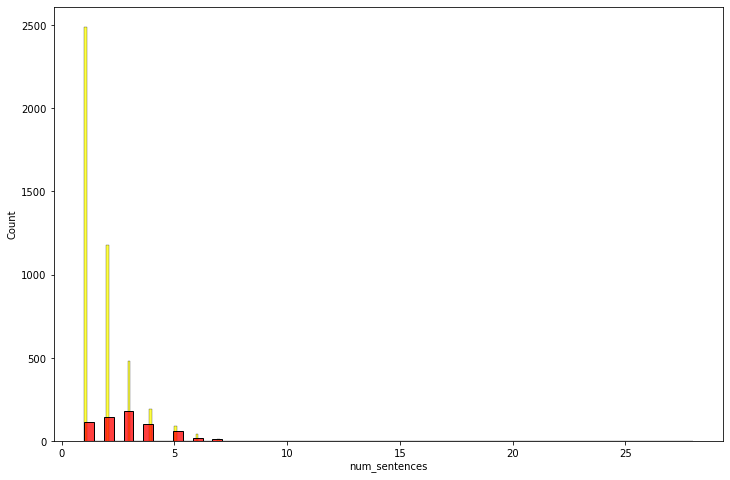

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Type']==0]['num_sentences'],color='yellow')
sns.histplot(data[data['Type']==1]['num_sentences'],color='red')
plt.show()

type 0 indicates not spam(yellow), type 1 indicates spam (red)
* percentage of spam increases as whole number of sentences increases.

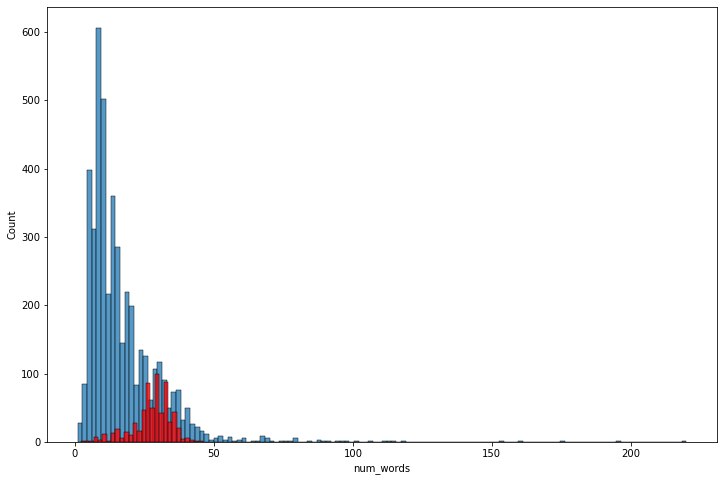

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Type']==0]['num_words']) # type = 0 not spam
sns.histplot(data[data['Type']==1]['num_words'],color='red') # type =1 spam
plt.show()

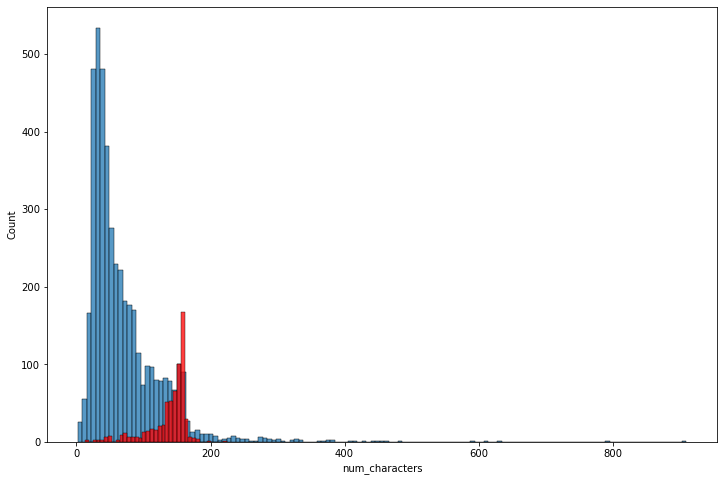

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Type']==0]['num_characters'])
sns.histplot(data[data['Type']==1]['num_characters'],color='red')
plt.show()

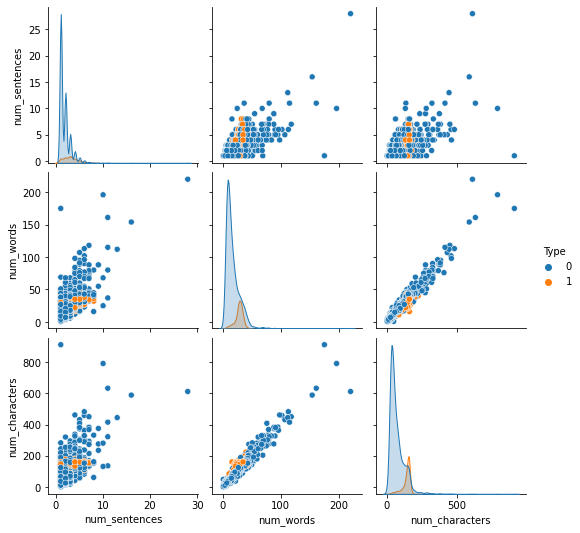

In [27]:
sns.pairplot(data,hue='Type')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='num_characters'>

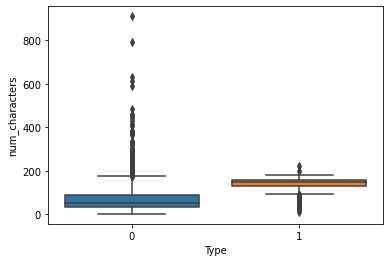

In [28]:
sns.boxplot(x='Type',y='num_characters',data=data)

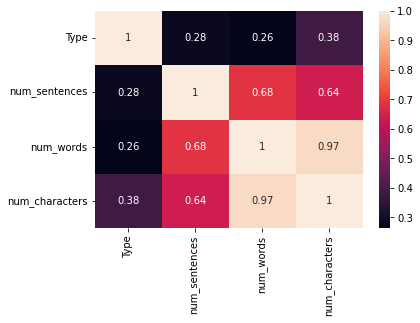

In [35]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### Data Preprocessing

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [32]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [33]:
ps=PorterStemmer()
def text_processing(text):
    words_text=nltk.word_tokenize(text.lower()) # splitting text into words
    y=[]
    for i in words_text:
        if i.isalnum(): # checking if the word is alpha numerical
            y.append(i)
    text=y[:] # creating a list of words
    print(text)
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # if word not in stop words and punctuation, go for stemming
            stemming=ps.stem(i)
            y.append(stemming)
    return " ".join(y)

In [34]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

['i', 'loved', 'the', 'yt', 'lectures', 'on', 'machine', 'learning', 'what', 'about', 'you', 'dacing', 'dance', 'danced']


'love yt lectur machin learn dace danc danc'

In [36]:
data['transformed_text']=data['msg'].apply(text_processing)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 'apply', '08452810075over18']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'do', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 'been', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'i', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']
['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent']
['as', 'per', 'your', 'reques

['your', 'gon', 'na', 'have', 'to', 'pick', 'up', 'a', '1', 'burger', 'for', 'yourself', 'on', 'your', 'way', 'home', 'i', 'ca', 'even', 'move', 'pain', 'is', 'killing', 'me']
['ha', 'ha', 'ha', 'good', 'joke', 'girls', 'are', 'situation', 'seekers']
['its', 'a', 'part', 'of', 'checking', 'iq']
['sorry', 'my', 'roommates', 'took', 'forever', 'it', 'ok', 'if', 'i', 'come', 'by', 'now']
['ok', 'lar', 'i', 'double', 'check', 'wif', 'da', 'hair', 'dresser', 'already', 'he', 'said', 'wun', 'cut', 'v', 'short', 'he', 'said', 'will', 'cut', 'until', 'i', 'look', 'nice']
['as', 'a', 'valued', 'customer', 'i', 'am', 'pleased', 'to', 'advise', 'you', 'that', 'following', 'recent', 'review', 'of', 'your', 'mob', 'no', 'you', 'are', 'awarded', 'with', 'a', 'bonus', 'prize', 'call', '09066364589']
['today', 'is', 'dedicated', 'day', 'which', 'song', 'will', 'u', 'dedicate', 'for', 'me', 'send', 'this', 'to', 'all', 'ur', 'valuable', 'frnds', 'but', 'first', 'rply', 'me']
['urgent', 'ur', 'awarded',

['are', 'you', 'there', 'in', 'room']
['hey', 'girl', 'how', 'r', 'u', 'hope', 'u', 'r', 'well', 'me', 'an', 'del', 'r', 'bak', 'again', 'long', 'time', 'no', 'c', 'give', 'me', 'a', 'call', 'sum', 'time', 'from', 'lucyxx']
['k', 'k', 'how', 'much', 'does', 'it', 'cost']
['i', 'home']
['dear', 'will', 'call', 'accomodate']
['first', 'answer', 'my', 'question']
['sunshine', 'quiz', 'wkly', 'q', 'win', 'a', 'top', 'sony', 'dvd', 'player', 'if', 'u', 'know', 'which', 'country', 'the', 'algarve', 'is', 'in', 'txt', 'ansr', 'to', 'sp', 'tyrone']
['want', '2', 'get', 'laid', 'tonight', 'want', 'real', 'dogging', 'locations', 'sent', 'direct', '2', 'ur', 'mob', 'join', 'the', 'uk', 'largest', 'dogging', 'network', 'bt', 'txting', 'gravel', 'to', '69888', 'nt', 'ec2a', '150p']
['i', 'only', 'haf', 'msn', 'it', 'yijue']
['he', 'is', 'there', 'you', 'call', 'and', 'meet', 'him']
['no', 'no', 'i', 'will', 'check', 'all', 'rooms', 'befor', 'activities']
['you', 'not', 'rcv', 'any', 'more', 'msgs',

['did', 'u', 'got', 'that', 'persons', 'story']
['is', 'your', 'hamster', 'dead', 'hey', 'so', 'tmr', 'i', 'meet', 'you', 'at', '1pm', 'orchard', 'mrt']
['hi', 'its', 'kate', 'how', 'is', 'your', 'evening', 'i', 'hope', 'i', 'can', 'see', 'you', 'tomorrow', 'for', 'a', 'bit', 'but', 'i', 'have', 'to', 'bloody', 'babyjontet', 'txt', 'back', 'if', 'u', 'can', 'xxx']
['found', 'it', 'enc', 'lt', 'gt', 'where', 'you', 'at']
['i', 'sent', 'you', 'lt', 'gt', 'bucks']
['hello', 'darlin', 'ive', 'finished', 'college', 'now', 'so', 'txt', 'me', 'when', 'u', 'finish', 'if', 'u', 'can', 'love', 'kate', 'xxx']
['your', 'account', 'has', 'been', 'refilled', 'successfully', 'by', 'inr', 'lt', 'decimal', 'gt', 'your', 'keralacircle', 'prepaid', 'account', 'balance', 'is', 'rs', 'lt', 'decimal', 'gt', 'your', 'transaction', 'id', 'is', 'kr', 'lt', 'gt']
['goodmorning', 'sleeping', 'ga']
['u', 'call', 'me', 'alter', 'at', '11', 'ok']
['ìï', 'say', 'until', 'like', 'dat', 'i', 'dun', 'buy', 'ericsson', 

['come', 'to', 'mu', 'we', 'sorting', 'out', 'our', 'narcotics', 'situation']
['night', 'has', 'ended', 'for', 'another', 'day', 'morning', 'has', 'come', 'in', 'a', 'special', 'way', 'may', 'you', 'smile', 'like', 'the', 'sunny', 'rays', 'and', 'leaves', 'your', 'worries', 'at', 'the', 'blue', 'blue', 'bay']
['hmv', 'bonus', 'special', '500', 'pounds', 'of', 'genuine', 'hmv', 'vouchers', 'to', 'be', 'won', 'just', 'answer', '4', 'easy', 'questions', 'play', 'now', 'send', 'hmv', 'to', '86688', 'more', 'info']
['usf', 'i', 'guess', 'might', 'as', 'well', 'take', '1', 'car']
['no', 'objection', 'my', 'bf', 'not', 'coming']
['thanx']
['tell', 'rob', 'to', 'mack', 'his', 'gf', 'in', 'the', 'theater']
['awesome', 'i', 'see', 'you', 'in', 'a', 'bit']
['just', 'sent', 'it', 'so', 'what', 'type', 'of', 'food', 'do', 'you', 'like']
['all', 'done', 'all', 'handed', 'in', 'celebrations', 'in', 'full', 'swing', 'yet']
['you', 'got', 'called', 'a', 'tool']
['u', 'miss', 'someone']
['i', 'asked', '

['just', 'checking', 'in', 'on', 'you', 'really', 'do', 'miss', 'seeing', 'jeremiah', 'do', 'have', 'a', 'great', 'month']
['nah', 'ca', 'help', 'you', 'there', 'i', 'never', 'had', 'an', 'iphone']
['if', 'you', 'not', 'in', 'my', 'car', 'in', 'an', 'hour', 'and', 'a', 'half', 'i', 'going', 'apeshit']
['today', 'is', 'sorry', 'if', 'ever', 'i', 'was', 'angry', 'with', 'you', 'if', 'ever', 'i', 'misbehaved', 'or', 'hurt', 'you', 'plz', 'plz', 'just', 'slap', 'urself', 'bcoz', 'its', 'ur', 'fault', 'i', 'basically', 'good']
['yo', 'you', 'guys', 'ever', 'figure', 'out', 'how', 'much', 'we', 'need', 'for', 'alcohol', 'jay', 'and', 'i', 'are', 'trying', 'to', 'figure', 'out', 'how', 'much', 'we', 'can', 'safely', 'spend', 'on', 'weed']
['lt', 'gt', 'ish', 'minutes', 'was', '5', 'minutes', 'ago', 'wtf']
['thank', 'you', 'for', 'to', 'say', 'happy', 'onam', 'to', 'you', 'am', 'fine', 'here', 'and', 'remembered', 'you', 'when', 'i', 'met', 'an', 'insurance', 'you', 'in', 'qatar', 'insha', 'ex

['100', 'dating', 'service', 'cal', 'l', '09064012103', 'box334sk38ch']
['whatsup', 'there', 'dont', 'u', 'want', 'to', 'sleep']
['alright', 'i', 'have', 'a', 'new', 'goal', 'now']
['free', 'entry', 'into', 'our', 'weekly', 'competition', 'just', 'text', 'the', 'word', 'win', 'to', '80086', 'now', '18', 't', 'c']
['alright', 'i', 'head', 'out', 'in', 'a', 'few', 'minutes', 'text', 'me', 'where', 'to', 'meet', 'you']
['send', 'a', 'logo', '2', 'ur', 'lover', '2', 'names', 'joined', 'by', 'a', 'heart', 'txt', 'love', 'name1', 'name2', 'mobno', 'eg', 'love', 'adam', 'eve', '07123456789', 'to', '87077', 'yahoo', 'pobox36504w45wq', 'txtno', '4', 'no', 'ads', '150p']
['yes', 'from', 'last', 'week', 'itself', 'i', 'taking', 'live', 'call']
['someone', 'has', 'contacted', 'our', 'dating', 'service', 'and', 'entered', 'your', 'phone', 'because', 'they', 'fancy', 'you', 'to', 'find', 'out', 'who', 'it', 'is', 'call', 'from', 'a', 'landline', '09111032124', 'pobox12n146tf150p']
['siva', 'is', 'in

['are', 'you', 'free', 'now', 'can', 'i', 'call', 'now']
['got', 'meh', 'when']
['nope', 'think', 'i', 'will', 'go', 'for', 'it', 'on', 'monday', 'sorry', 'i', 'replied', 'so', 'late']
['some', 'of', 'them', 'told', 'accenture', 'is', 'not', 'confirm', 'is', 'it', 'true']
['kate', 'jackson', 'rec', 'center', 'before', '7ish', 'right']
['dear', 'i', 'have', 'reache', 'room']
['fighting', 'with', 'the', 'world', 'is', 'easy', 'u', 'either', 'win', 'or', 'lose', 'bt', 'fightng', 'with', 'some1', 'who', 'is', 'close', 'to', 'u', 'is', 'dificult', 'if', 'u', 'lose', 'u', 'lose', 'if', 'u', 'win', 'u', 'still', 'lose']
['when', 'can', 'come', 'out']
['check', 'with', 'nuerologist']
['lolnice', 'i', 'went', 'from', 'a', 'fish', 'to', 'water']
['congratulations', 'in', 'this', 'week', 'competition', 'draw', 'u', 'have', 'won', 'the', 'prize', 'to', 'claim', 'just', 'call', '09050002311', 'b4280703', 't', 'sms', 'over', '18', 'only', '150ppm']
['no', 'it', 'waiting', 'in', 'e', 'car', 'dat', 'b

['fuck', 'babe', 'i', 'miss', 'you', 'already', 'you', 'know', 'ca', 'you', 'let', 'me', 'send', 'you', 'some', 'money', 'towards', 'your', 'net', 'i', 'need', 'you', 'i', 'want', 'you', 'i', 'crave', 'you']
['ill', 'call', 'u', '2mrw', 'at', 'ninish', 'with', 'my', 'address', 'that', 'icky', 'american', 'freek', 'wont', 'stop', 'callin', 'me', '2', 'bad', 'jen', 'k', 'eh']
['oooh', 'bed', 'ridden', 'ey', 'what', 'are', 'you', 'thinking', 'of']
['so', 'anyways', 'you', 'can', 'just', 'go', 'to', 'your', 'gym', 'or', 'whatever', 'my', 'love', 'smiles', 'i', 'hope', 'your', 'ok', 'and', 'having', 'a', 'good', 'day', 'babe', 'i', 'miss', 'you', 'so', 'much', 'already']
['love', 'it', 'daddy', 'will', 'make', 'you', 'scream', 'with', 'pleasure', 'i', 'am', 'going', 'to', 'slap', 'your', 'ass', 'with', 'my', 'dick']
['wot', 'u', 'wan', 'na', 'do', 'then', 'missy']
['yar', 'lor', 'wait', '4', 'my', 'mum', '2', 'finish', 'sch', 'then', 'have', 'lunch', 'lor', 'i', 'whole', 'morning', 'stay', 

['allo', 'we', 'have', 'braved', 'the', 'buses', 'and', 'taken', 'on', 'the', 'trains', 'and', 'triumphed', 'i', 'mean', 'in', 'have', 'a', 'jolly', 'good', 'rest', 'of', 'week']
['watching', 'cartoon', 'listening', 'music', 'amp', 'at', 'eve', 'had', 'to', 'go', 'temple', 'amp', 'church', 'what', 'about', 'u']
['do', 'you', 'mind', 'if', 'i', 'ask', 'what', 'happened', 'you', 'dont', 'have', 'to', 'say', 'if', 'it', 'is', 'uncomfortable']
['private', 'your', '2003', 'account', 'statement', 'for', 'shows', '800', 'points', 'call', '08715203694', 'identifier', 'code', '40533', 'expires']
['no', 'prob', 'i', 'will', 'send', 'to', 'your', 'email']
['you', 'have', 'won', 'cash', 'or', 'a', 'prize', 'to', 'claim', 'call09050000327', 't', 'c', 'rstm', 'sw7', '3ss', '150ppm']
['thats', 'cool', 'sometimes', 'slow', 'and', 'gentle', 'sonetimes', 'rough', 'and', 'hard']
['i', 'gon', 'na', 'say', 'no', 'sorry', 'i', 'would', 'but', 'as', 'normal', 'am', 'starting', 'to', 'panic', 'about', 'time',

['you', 'have', 'won', 'a', 'guaranteed', 'cash', 'or', 'a', 'prize', 'to', 'claim', 'yr', 'prize', 'call', 'our', 'customer', 'service', 'representative', 'on', '08714712394', 'between']
['macha', 'dont', 'feel', 'can', 'assume', 'your', 'me', 'one', 'evening', 'with', 'me', 'and', 'i', 'have', 'some', 'wonderful', 'plans', 'for', 'both', 'of', 'life', 'begin', 'me', 'anytime']
['oh', 'is', 'it', 'send', 'me', 'the', 'address']
['anytime', 'all', 'the', 'best', 'with', 'it']
['that', 'is', 'wondar', 'full', 'flim']
['ya', 'even', 'those', 'cookies', 'have', 'jelly', 'on', 'them']
['the', 'world', 'is', 'running', 'and', 'i', 'am', 'all', 'are', 'feeling', 'the', 'same', 'so', 'be', 'i', 'have', 'to', 'admit', 'i', 'am', 'where', 'is', 'the', 'correction', 'or', 'let', 'me', 'call', 'this', 'is', 'keep', 'running', 'with', 'the', 'world', 'may', 'be', 'u', 'r', 'also', 'run']
['got', 'it', 'it', 'looks', 'scrumptious', 'daddy', 'wants', 'to', 'eat', 'you', 'all', 'night', 'long']
['of'

['this', 'is', 'hoping', 'you', 'enjoyed', 'your', 'game', 'yesterday', 'sorry', 'i', 'not', 'been', 'in', 'touch', 'but', 'pls', 'know', 'that', 'you', 'are', 'fondly', 'bein', 'thot', 'off', 'have', 'a', 'great', 'week', 'abiola']
['all', 'e', 'best', '4', 'ur', 'driving', 'tmr']
['y', 'where', 'u', 'at', 'dogbreath', 'its', 'just', 'sounding', 'like', 'jan', 'c', 'thatåõs', 'al']
['omg', 'i', 'want', 'to', 'scream', 'i', 'weighed', 'myself', 'and', 'i', 'lost', 'more', 'weight', 'woohoo']
['there', 'generally', 'is', 'one', 'it', 'an', 'uncountable', 'noun', 'u', 'in', 'the', 'dictionary', 'pieces', 'of', 'research']
['it', 'really', 'getting', 'me', 'down', 'just', 'hanging', 'around']
['orange', 'customer', 'you', 'may', 'now', 'claim', 'your', 'free', 'camera', 'phone', 'upgrade', 'for', 'your', 'loyalty', 'call', 'now', 'on', '0207', '153', 'offer', 'ends', '14thmarch', 't', 'c', 'apply', 'availa']
['boy', 'whereare', 'you', 'me', 'and', 'all', 'your', 'friendsare', 'in', 'theki

['did', 'he', 'just', 'say', 'somebody', 'is', 'named', 'tampa']
['in', 'work', 'now', 'going', 'have', 'in', 'few', 'min']
['your', 'brother', 'is', 'a', 'genius']
['sorry', 'i', 'guess', 'whenever', 'i', 'can', 'get', 'a', 'hold', 'of', 'my', 'connections', 'maybe', 'an', 'hour', 'or', 'two', 'i', 'text', 'you']
['did', 'u', 'find', 'out', 'what', 'time', 'the', 'bus', 'is', 'at', 'coz', 'i', 'need', 'to', 'sort', 'some', 'stuff', 'out']
['dude', 'ive', 'been', 'seeing', 'a', 'lotta', 'corvettes', 'lately']
['congratulations', 'ur', 'awarded', 'either', 'a', 'yrs', 'supply', 'of', 'cds', 'from', 'virgin', 'records', 'or', 'a', 'mystery', 'gift', 'guaranteed', 'call', '09061104283', 'ts', 'cs', 'approx', '3mins']
['same', 'here', 'but', 'i', 'consider', 'walls', 'and', 'bunkers', 'and', 'shit', 'important', 'just', 'because', 'i', 'never', 'play', 'on', 'peaceful', 'but', 'i', 'guess', 'your', 'place', 'is', 'high', 'enough', 'that', 'it', 'do', 'matter']
['private', 'your', '2003', '

['k', 'i', 'will', 'give', 'my', 'kvb', 'acc', 'details']
['oh', 'all', 'have', 'to', 'come', 'ah']
['money', 'you', 'r', 'a', 'lucky', 'winner', '2', 'claim', 'your', 'prize', 'text', 'money', '2', '88600', 'over', 'to', 'give', 'away', 'text', 'rate', 'box403', 'w1t1jy']
['i', 'really', 'sorry', 'i', 'wo', 'b', 'able', '2', 'do', 'this', 'u', 'can', 'find', 'an', 'yr', 'term', 'going', 'ok']
['congratulations', 'ore', 'mo', 'owo', 're', 'wa', 'enjoy', 'it', 'and', 'i', 'wish', 'you', 'many', 'happy', 'moments', 'to', 'and', 'fro', 'wherever', 'you', 'go']
['so', 'do', 'you', 'have', 'samus', 'shoulders', 'yet']
['what', 'time', 'you', 'think', 'you', 'have', 'it', 'need', 'to', 'know', 'when', 'i', 'should', 'be', 'near', 'campus']
['dear', 'matthew', 'please', 'call', '09063440451', 'from', 'a', 'landline', 'your', 'complimentary', '4', 'lux', 'tenerife', 'holiday', 'or', 'cash', 'await', 'collection', 'ppm150', 'sae', 't', 'cs', 'box334', 'sk38xh']
['then', 'dun', 'wear', 'jeans', 

['aight', 'will', 'do', 'thanks', 'again', 'for', 'comin', 'out']
['no', 'but', 'heard', 'abt', 'tat']
['lt', 'gt', 'am', 'i', 'think', 'should', 'say', 'on', 'syllabus']
['umma', 'did', 'she', 'say', 'anything']
['give', 'me', 'a', 'sec', 'to', 'think', 'think', 'about', 'it']
['panasonic', 'bluetoothhdset', 'free', 'nokia', 'free', 'motorola', 'free', 'doublemins', 'doubletxt', 'on', 'orange', 'contract', 'call', 'mobileupd8', 'on', '08000839402', 'or', 'call', '2optout']
['i', 'do', 'quite', 'know', 'what', 'to', 'do', 'i', 'still', 'ca', 'get', 'hold', 'of', 'anyone', 'i', 'cud', 'pick', 'you', 'up', 'bout', 'and', 'we', 'can', 'see', 'if', 'they', 'in', 'the', 'pub']
['poyyarikatur', 'kolathupalayam', 'unjalur', 'post', 'erode', 'dis', 'lt', 'gt']
['dear', 'hero', 'i', 'am', 'leaving', 'to', 'qatar', 'tonite', 'for', 'an', 'apt', 'do', 'keep', 'in', 'touch', 'at', 'lt', 'email', 'gt', 'kerala']
['lol', 'i', 'would', 'but', 'my', 'mom', 'would', 'have', 'a', 'fit', 'and', 'tell', '

['aight', 'ill', 'get', 'on', 'fb', 'in', 'a', 'couple', 'minutes']
['oi', 'ami', 'parchi', 'na', 're', 'kicchu', 'kaaj', 'korte', 'iccha', 'korche', 'na', 'phone', 'ta', 'tul', 'na', 'plz', 'plz']
['where', 'can', 'download', 'clear', 'movies', 'dvd', 'copies']
['yep', 'by', 'the', 'pretty', 'sculpture']
['convey', 'my', 'regards', 'to', 'him']
['me', 'too', 'watching', 'surya', 'movie', '6', 'pm', 'vijay', 'movie', 'pokkiri']
['you', 'tell', 'what', 'happen', 'dont', 'behave', 'like', 'this', 'to', 'me', 'ok', 'no', 'need', 'to', 'say']
['can', 'u', 'get', 'pic', 'msgs', 'to', 'your', 'phone']
['send', 'to', 'someone', 'else']
['wat', 'makes', 'some', 'people', 'dearer', 'is', 'not', 'just', 'de', 'happiness', 'dat', 'u', 'feel', 'when', 'u', 'meet', 'them', 'but', 'de', 'pain', 'u', 'feel', 'when', 'u', 'miss', 'dem']
['for', 'me', 'the', 'love', 'should', 'start', 'with', 'should', 'feel', 'that', 'i', 'need', 'her', 'every', 'time', 'around', 'should', 'be', 'the', 'first', 'thing

['really', 'i', 'tot', 'ur', 'paper', 'ended', 'long', 'ago', 'but', 'wat', 'u', 'copied', 'jus', 'now', 'got', 'use', 'u', 'happy', 'lar', 'i', 'still', 'haf', '2', 'study']
['thank', 'you', 'winner', 'notified', 'by', 'sms', 'good', 'luck', 'no', 'future', 'marketing', 'reply', 'stop', 'to', '84122', 'customer', 'services', '08450542832']
['babe', 'i', 'lost', 'you']
['ok', 'help', 'me', 'ask', 'if', 'she', 'working', 'tmr', 'a', 'not']
['i', 'not', 'driving', 'raining', 'then', 'i', 'get', 'caught', 'at', 'e', 'mrt', 'station', 'lor']
['not', 'a', 'drop', 'in', 'the', 'tank']
['that', 'said', 'can', 'you', 'text', 'him', 'one', 'more', 'time']
['ok', 'i', 'go', 'change', 'also']
['1000', 'of', 'girls', 'many', 'local', '2', 'u', 'who', 'r', 'virgins', '2', 'this', 'r', 'ready', '2', '4fil', 'ur', 'every', 'sexual', 'need', 'can', 'u', '4fil', 'theirs', 'text', 'cute', 'to', '69911', 'm']
['did', 'u', 'find', 'a', 'sitter', 'for', 'kaitlyn', 'i', 'was', 'sick', 'and', 'slept', 'all',

['is', 'ur', 'paper', 'in', 'e', 'morn', 'or', 'aft', 'tmr']
['dear', 'relieved', 'of', 'westonzoyland', 'all', 'going', 'to', 'plan', 'this', 'end', 'too']
['hope', 'you', 'are', 'having', 'a', 'great', 'new', 'semester', 'do', 'wish', 'you', 'the', 'very', 'best', 'you', 'are', 'made', 'for', 'greatness']
['oh', 'yes', 'i', 'can', 'speak', 'txt', '2', 'u', 'no', 'hmm', 'did', 'u', 'get', 'email']
['i', 'want', 'to', 'show', 'you', 'the', 'world', 'princess', 'how', 'about', 'europe']
['nobody', 'can', 'decide', 'where', 'to', 'eat', 'and', 'dad', 'wants', 'chinese']
['no', 'shoot', 'me', 'i', 'in', 'the', 'docs', 'waiting', 'room']
['now', 'i', 'going', 'out', '4', 'dinner', 'soon']
['hello', 'which', 'the', 'site', 'to', 'download', 'songs', 'its', 'urgent', 'pls']
['i', 'do', 'know', 'what', 'u', 'mean', 'is', 'the', 'king', 'of', 'not', 'havin', 'credit', 'i', 'goin2bed', 'now', 'night', 'night', 'sweet', 'only1more', 'sleep']
['horrible', 'gal', 'me', 'in', 'sch', 'doing', 'some'

['win', 'the', 'newest', 'potter', 'and', 'the', 'order', 'of', 'the', 'phoenix', 'book', '5', 'reply', 'harry', 'answer', '5', 'questions', 'chance', 'to', 'be', 'the', 'first', 'among', 'readers']
['correct', 'so', 'how', 'was', 'work', 'today']
['just', 'sent', 'again', 'do', 'you', 'scream', 'and', 'moan', 'in', 'bed', 'princess']
['i', 'wake', 'up', 'long', 'ago', 'already', 'dunno', 'what', 'other', 'thing']
['oh', 'just', 'getting', 'even', 'with', 'u', 'u']
['i', 'thk', '50', 'shd', 'be', 'ok', 'he', 'said', 'plus', 'minus', '10', 'did', 'leave', 'a', 'line', 'in', 'between', 'paragraphs']
['can', 'you', 'call', 'me', 'plz', 'your', 'number', 'shows', 'out', 'of', 'coveragd', 'area', 'i', 'have', 'urgnt', 'call', 'in', 'vasai', 'amp', 'have', 'to', 'reach', 'before', '4', 'o', 'clock', 'so', 'call', 'me', 'plz']
['yeah', 'jay', 'sort', 'of', 'a', 'fucking', 'retard']
['sorry', 'was', 'in', 'the', 'bathroom', 'sup']
['ur', 'balance', 'is', 'now', 'ur', 'next', 'question', 'is', 

['haha', 'where', 'got', 'so', 'fast', 'lose', 'weight', 'thk', 'muz', 'go', '4', 'a', 'month', 'den', 'got', 'effect', 'gee', 'later', 'we', 'go', 'aust', 'put', 'bk', 'e', 'weight']
['i', 'wonder', 'how', 'you', 'got', 'online', 'my', 'love', 'had', 'you', 'gone', 'to', 'the', 'net', 'cafe', 'did', 'you', 'get', 'your', 'phone', 'recharged', 'were', 'you', 'on', 'a', 'friends', 'net', 'i', 'think', 'of', 'you', 'boytoy']
['haha', 'just', 'kidding', 'papa', 'needs', 'drugs']
['thk', 'shld', 'b', 'can', 'ya', 'i', 'wana', 'go', '4', 'lessons', 'haha', 'can', 'go', 'for', 'one', 'whole', 'stretch']
['oh', 'ok']
['r', 'we', 'still', 'meeting', '4', 'dinner', 'tonight']
['thats', 'cool', 'i', 'am', 'a', 'gentleman', 'and', 'will', 'treat', 'you', 'with', 'dignity', 'and', 'respect']
['shall', 'i', 'start', 'from', 'hear']
['then', 'we', 'wait', '4', 'u', 'lor', 'no', 'need', '2', 'feel', 'bad', 'lar']
['no', 'did', 'you', 'check', 'i', 'got', 'his', 'detailed', 'message', 'now']
['you', '

['i', 'watching', 'lotr', 'w', 'my', 'sis', 'dis', 'aft', 'so', 'u', 'wan', '2', 'meet', 'me', '4', 'dinner', 'at', 'nite', 'a', 'not']
['why', 'you', 'keeping', 'me', 'away', 'like', 'this']
['i', 'think', 'its', 'far', 'more', 'than', 'that', 'but', 'find', 'out', 'check', 'google', 'maps', 'for', 'a', 'place', 'from', 'your', 'dorm']
['my', 'trip', 'was', 'ok', 'but', 'quite', 'tiring', 'lor', 'uni', 'starts', 'today', 'but', 'it', 'ok', '4', 'me', 'cos', 'i', 'not', 'taking', 'any', 'modules', 'but', 'jus', 'concentrating', 'on', 'my', 'final', 'yr', 'project']
['have', 'you', 'always', 'been', 'saying', 'welp']
['i', 'a', 'guy', 'browsin', 'is', 'compulsory']
['purity', 'of', 'friendship', 'between', 'two', 'is', 'not', 'about', 'smiling', 'after', 'reading', 'the', 'forwarded', 'message', 'its', 'about', 'smiling', 'just', 'by', 'seeing', 'the', 'name', 'gud', 'evng', 'musthu']
['i', 'should', 'add', 'that', 'i', 'do', 'really', 'care', 'and', 'if', 'you', 'ca', 'i', 'can', 'at',

['good', 'afternoon', 'my', 'love', 'any', 'job', 'prospects', 'are', 'you', 'missing', 'me', 'what', 'do', 'you', 'do', 'are', 'you', 'being', 'lazy', 'and', 'bleak', 'hmmm', 'or', 'happy', 'and', 'filled', 'with', 'my', 'love']
['shant', 'disturb', 'u', 'anymore', 'jia', 'you']
['bishan', 'lar', 'nearer', 'no', 'need', 'buy', 'so', 'early', 'cos', 'if', 'buy', 'now', 'i', 'got', 'ta', 'park', 'my', 'car']
['me', 'i', 'dont', 'know', 'again', 'oh']
['dude', 'sux', 'for', 'snake', 'he', 'got', 'old', 'and', 'raiden', 'got', 'buff']
['he', 'says', 'hi', 'and', 'to', 'get', 'your', 'ass', 'back', 'to', 'south', 'tampa', 'preferably', 'at', 'a', 'kegger']
['in', 'e', 'msg', 'jus', 'now', 'u', 'said', 'thanks', 'for', 'gift']
['u', 'too']
['ok', 'how', 'you', 'dear', 'did', 'you', 'call', 'chechi']
['yeah', 'we', 'do', 'totes', 'when', 'u', 'wan', 'na']
['ok', 'i', 'found', 'dis', 'pierre', 'cardin', 'one', 'which', 'looks', 'normal', 'costs', '20', 'its', 'on', 'sale']
['good', 'sleep', '

['living', 'is', 'very', 'simple', 'loving', 'is', 'also', 'simple', 'laughing', 'is', 'too', 'simple', 'winning', 'is', 'tooo', 'simple', 'but', 'being', 'is', 'very', 'difficult', 'gud', 'nte']
['u', 'have', 'a', 'secret', 'admirer', 'who', 'is', 'looking', '2', 'make', 'contact', 'with', 'out', 'who', 'they', 'r', 'reveal', 'who', 'thinks', 'ur', 'so', 'on', '09058094599']
['ah', 'well', 'that', 'confuses', 'things', 'it']
['500', 'free', 'text', 'msgs', 'just', 'text', 'ok', 'to', '80488', 'and', 'we', 'credit', 'your', 'account']
['hi', 'dear', 'call', 'me', 'its', 'urgnt', 'i', 'do', 'know', 'whats', 'your', 'problem', 'you', 'do', 'want', 'to', 'work', 'or', 'if', 'you', 'have', 'any', 'other', 'problem', 'at', 'least', 'tell', 'me', 'wating', 'for', 'your', 'reply']
['dear', 'how', 'you', 'are', 'you', 'ok']
['you', 'have', 'been', 'selected', 'to', 'stay', 'in', '1', 'of', '250', 'top', 'british', 'hotels', 'for', 'nothing', 'holiday', 'worth', 'to', 'claim', 'call', 'london',

['sorry', 'man', 'my', 'stash', 'ran', 'dry', 'last', 'night', 'and', 'i', 'ca', 'pick', 'up', 'more', 'until', 'sunday']
['hai', 'priya', 'are', 'you', 'right', 'what', 'doctor', 'said', 'where', 'are', 'you']
['free', 'msg', 'sorry', 'a', 'service', 'you', 'ordered', 'from', '81303', 'could', 'not', 'be', 'delivered', 'as', 'you', 'do', 'not', 'have', 'sufficient', 'credit', 'please', 'top', 'up', 'to', 'receive', 'the', 'service']
['please', 'ask', 'mummy', 'to', 'call', 'father']
['can', 'come', 'my', 'room', 'but', 'can', 'not', 'come', 'my', 'house', 'cos', 'my', 'house', 'still', 'messy', 'haha']
['i', 'have', 'lost', '10', 'kilos', 'as', 'of', 'today']
['just', 'taste', 'fish', 'curry']
['what', 'can', 'i', 'do', 'might', 'accidant', 'tookplace', 'between', 'somewhere', 'ghodbandar', 'rd', 'traffic', 'moves', 'slovely', 'so', 'plz', 'slip', 'amp', 'do', 'worry']
['yun', 'wkg', 'where', 'btw', 'if', 'go', 'nus', 'sc', 'ìï', 'wana', 'specialise', 'in', 'wad']
['yes', 'i', 'am', '

['watching', 'tv', 'now', 'i', 'got', 'new', 'job']
['good', 'afternoon', 'sexy', 'buns', 'how', 'goes', 'the', 'job', 'search', 'i', 'wake', 'and', 'you', 'are', 'my', 'first', 'thought', 'as', 'always', 'my', 'love', 'i', 'wish', 'your', 'fine', 'and', 'happy', 'and', 'know', 'i', 'adore', 'you']
['i', 'not', 'coming', 'over', 'do', 'whatever', 'you', 'want']
['its', 'ok', 'chikku', 'and', 'its', 'my', '1', 'of', 'favourite', 'song']
['did', 'u', 'see', 'what', 'i', 'posted', 'on', 'your', 'facebook']
['call', 'freephone', '0800', '542', '0578', 'now']
['buy', 'space', 'invaders', '4', 'a', 'chance', '2', 'win', 'orig', 'arcade', 'game', 'console', 'press', '0', 'for', 'games', 'arcade', 'std', 'wap', 'charge', 'see', '4', 'terms', 'settings', 'no', 'purchase']
['big', 'brother', 'alert', 'the', 'computer', 'has', 'selected', 'u', 'for', '10k', 'cash', 'or', '150', 'voucher', 'call', 'ntt', 'po', 'box', 'cro1327', 'bt', 'landline', 'cost', '150ppm', 'mobiles', 'vary']
['oh', 'well', 

['this', 'is', 'the', '2nd', 'time', 'we', 'have', 'tried', '2', 'contact', 'u', 'have', 'won', 'the', '750', 'pound', 'prize', '2', 'claim', 'is', 'easy', 'call', '08718726970', 'now', 'only', '10p', 'per', 'min']
['i', 'just', 'made', 'some', 'payments', 'so', 'dont', 'have', 'that', 'much', 'sorry', 'would', 'you', 'want', 'it', 'fedex', 'or', 'the', 'other', 'way']
['they', 'play', 'one', 'day', 'last', 'year', 'know', 'even', 'though', 'they', 'have', 'very', 'good', 'team', 'like', 'india']
['you', 'are', 'the', 'only', 'girl', 'waiting', 'in', 'reception', 'ah']
['say', 'this', 'god', 'i', 'love', 'you', 'amp', 'i', 'need', 'you', 'clean', 'my', 'heart', 'with', 'your', 'this', 'to', 'ten', 'special', 'people', 'amp', 'u', 'c', 'miracle', 'tomorrow', 'do', 'it', 'pls', 'pls', 'do', 'it']
['i', 'hate', 'when', 'she', 'does', 'this', 'she', 'turns', 'what', 'should', 'be', 'a', 'fun', 'shopping', 'trip', 'into', 'an', 'annoying', 'day', 'of', 'how', 'everything', 'would', 'look', 

['we', 'don', 'call', 'like', 'lt', 'gt', 'times', 'oh', 'no', 'give', 'us', 'hypertension', 'oh']
['dont', 'give', 'a', 'monkeys', 'wot', 'they', 'think', 'and', 'i', 'certainly', 'do', 'mind', 'any', 'friend', 'of', 'mine', 'all', 'that', 'just', 'do', 'sleep', 'wiv', 'that', 'wud', 'be', 'annoyin']
['omg', 'it', 'could', 'snow', 'here', 'tonite']
['call', 'from', '08702490080', 'tells', 'u', '2', 'call', '09066358152', 'to', 'claim', 'prize', 'u', 'have', '2', 'enter', 'all', 'ur', 'mobile', 'personal', 'details', 'the', 'prompts', 'careful']
['free', '1st', 'week', 'entry', '2', 'textpod', '4', 'a', 'chance', '2', 'win', '40gb', 'ipod', 'or', 'cash', 'every', 'wk', 'txt', 'vpod', 'to', '81303', 'ts', 'cs', 'custcare', '08712405020']
['carry', 'on', 'not', 'disturbing', 'both', 'of', 'you']
['what', 'pa', 'tell', 'me', 'i', 'went', 'to', 'bath']
['jus', 'finished', 'avatar', 'nigro']
['r', 'u', 'over', 'scratching', 'it']
['hope', 'you', 'are', 'having', 'a', 'great', 'day']
['did',

['do', 'whatever', 'you', 'want', 'you', 'know', 'what', 'the', 'rules', 'are', 'we', 'had', 'a', 'talk', 'earlier', 'this', 'week', 'about', 'what', 'had', 'to', 'start', 'happening', 'you', 'showing', 'responsibility', 'yet', 'every', 'week', 'it', 'can', 'i', 'bend', 'the', 'rule', 'this', 'way', 'what', 'about', 'that', 'way', 'do', 'whatever', 'i', 'tired', 'of', 'having', 'thia', 'same', 'argument', 'with', 'you', 'every', 'week', 'and', 'a', 'lt', 'gt', 'movie', 'doesnt', 'inlude', 'the', 'previews', 'you', 'still', 'getting', 'in', 'after', '1']
['beautiful', 'truth', 'against', 'gravity', 'read', 'carefully', 'heart', 'feels', 'light', 'when', 'someone', 'is', 'in', 'it', 'but', 'it', 'feels', 'very', 'heavy', 'when', 'someone', 'leaves', 'it', 'goodmorning']
['great', 'news', 'call', 'freefone', '08006344447', 'to', 'claim', 'your', 'guaranteed', 'cash', 'or', 'gift', 'speak', 'to', 'a', 'live', 'operator', 'now']
['ambrith', 'madurai', 'met', 'u', 'in', 'arun', 'dha', 'marrg

['probably', 'want', 'to', 'pick', 'up', 'more']
['i', 'done']
['are', 'you', 'the', 'cutest', 'girl', 'in', 'the', 'world', 'or', 'what']
['no', 'dice', 'art', 'class', '6', 'thru', '9', 'thanks', 'though', 'any', 'idea', 'what', 'time', 'i', 'should', 'come', 'tomorrow']
['sms', 'services', 'for', 'your', 'inclusive', 'text', 'credits', 'pls', 'goto', 'unsubscribe', 'with', 'stop', 'no', 'extra', 'charge', 'po', 'box420', 'ip4', '5we']
['oh', 'howda', 'gud', 'gud', 'mathe', 'en', 'samachara', 'chikku']
['i', 'thk', '530', 'lor', 'but', 'dunno', 'can', 'get', 'tickets', 'a', 'not', 'wat', 'u', 'doing', 'now']
['audrie', 'lousy', 'autocorrect']
['its', 'a', 'site', 'to', 'simulate', 'the', 'test', 'it', 'just', 'gives', 'you', 'very', 'tough', 'questions', 'to', 'test', 'your', 'readiness']
['anyway', 'seriously', 'hit', 'me', 'up', 'when', 'you', 'back', 'because', 'otherwise', 'i', 'have', 'to', 'light', 'up', 'with', 'armand', 'and', 'he', 'always', 'has', 'shit', 'is', 'vomiting']


['have', 'good', 'crickiting', 'mind']
['thx', 'all', 'will', 'be', 'well', 'in', 'a', 'few', 'months']
['i', 'please', 'come', 'up', 'now', 'imin', 'if', 'urgoin', 'outl8r']
['i', 'wont', 'so', 'wat', 'wit', 'the', 'guys']
['yavnt', 'tried', 'yet', 'and', 'never', 'played', 'original', 'either']
['hiya', 'had', 'a', 'good', 'day', 'have', 'you', 'spoken', 'to', 'since', 'the', 'weekend']
['see', 'i', 'thought', 'it', 'all', 'through']
['get', 'ready', 'to', 'moan', 'and', 'scream']
['oh', 'k', 'why', 'you', 'got', 'job', 'then', 'whats', 'up']
['i', 'don', 't', 'think', 'so', 'you', 'do', 'need', 'to', 'be', 'going', 'out', 'that', 'late', 'on', 'a', 'school', 'night', 'especially', 'when', 'the', 'one', 'class', 'you', 'have', 'is', 'the', 'one', 'you', 'missed', 'last', 'wednesday', 'and', 'probably', 'failed', 'a', 'test', 'in', 'on', 'friday']
['and', 'popping', 'lt', 'gt', 'ibuprofens', 'was', 'no', 'help']
['babe', 'how', 'goes', 'that', 'day', 'what', 'are', 'you', 'doing', 'wh

['no', 'management', 'puzzeles']
['how', 'did', 'you', 'find', 'out', 'in', 'a', 'way', 'that', 'did', 'include', 'all', 'of', 'these', 'details']
['hi', 'ya', 'babe', 'x', 'u', '4goten', 'bout', 'me', 'scammers', 'getting', 'smart', 'though', 'this', 'is', 'a', 'regular', 'vodafone', 'no', 'if', 'you', 'respond', 'you', 'get', 'further', 'prem', 'rate', 'other', 'nos', 'used', 'also', 'beware']
['back', '2', 'work', '2morro', 'half', 'term', 'over', 'can', 'u', 'c', 'me', '2nite', '4', 'some', 'sexy', 'passion', 'b4', 'i', 'have', '2', 'go', 'back', 'chat', 'now', '09099726481', 'luv', 'dena', 'calls']
['will', 'you', 'like', 'to', 'be', 'spoiled']
['thanks', 'for', 'your', 'ringtone', 'order', 'ref', 'number', 'r836', 'your', 'mobile', 'will', 'be', 'charged', 'should', 'your', 'tone', 'not', 'arrive', 'please', 'call', 'customer', 'services', 'on', '09065069154']
['i', 'am', 'getting', 'threats', 'from', 'your', 'sales', 'executive', 'shifad', 'as', 'i', 'raised', 'complaint', 'agai

['am', 'surfing', 'online', 'store', 'for', 'offers', 'do', 'you', 'want', 'to', 'buy', 'any', 'thing']
['long', 'beach', 'lor', 'expected', 'u', 'having', 'dinner', 'now']
['at', 'home', 'by', 'the', 'way']
['we', 'are', 'both', 'fine', 'thanks']
['what', 'happen', 'to', 'her', 'tell', 'the', 'truth']
['do', 'you', 'like', 'italian', 'food']
['which', 'is', 'weird', 'because', 'i', 'know', 'i', 'had', 'it', 'at', 'one', 'point']
['you', 'must', 'be', 'nearly', 'dead', 'well', 'jez', 'iscoming', 'over', 'todo', 'some', 'workand', 'that', 'whilltake', 'forever']
['tell', 'your', 'friends', 'what', 'you', 'plan', 'to', 'do', 'on', 'valentines', 'day', 'lt', 'url', 'gt']
['alright', 'see', 'you', 'in', 'a', 'bit']
['cheers', 'for', 'the', 'message', 'zogtorius', 'iåõve', 'been', 'staring', 'at', 'my', 'phone', 'for', 'an', 'age', 'deciding', 'whether', 'to', 'text', 'or', 'not']
['i', 'will', 'take', 'care', 'of', 'financial', 'will', 'help']
['tell', 'dear', 'what', 'happen', 'to', 'you'

['oh', 'oh', 'wasted', 'den', 'muz', 'chiong', 'on', 'sat', 'n', 'sun', 'liao']
['jesus', 'christ', 'bitch', 'i', 'trying', 'to', 'give', 'you', 'drugs', 'answer', 'your', 'fucking', 'phone']
['please', 'give', 'it', '2', 'or', 'i', 'will', 'pick', 'it', 'up', 'on', 'tuesday', 'evening', 'about', '8', 'if', 'that', 'is', 'ok']
['i', 'meeting', 'darren']
['one', 'of', 'best', 'dialogue', 'in', 'cute', 'reltnship', 'i', 'die']
['solve', 'd', 'case', 'a', 'man', 'was', 'found', 'murdered', 'on', 'lt', 'decimal', 'gt', 'lt', 'gt', 'afternoon', '1', 'his', 'wife', 'called', 'police', '2', 'police', 'questioned', 'everyone', '3', 'wife', 'sir', 'i', 'was', 'sleeping', 'when', 'the', 'murder', 'took', 'place', 'i', 'was', 'cooking', 'i', 'was', 'picking', 'vegetables', 'i', 'went', '2', 'd', 'post', 'office', 'we', 'went', '2', 'play', 'we', 'went', '2', 'a', 'marriage', 'police', 'arrested', 'd', 'murderer', 'immediately', 'who', 'it', 'reply', 'with', 'reason', 'if', 'u', 'r', 'brilliant']


['do', 'it', 'at', 'evening', 'da', 'urgent']
['pansy', 'you', 'been', 'living', 'in', 'a', 'jungle', 'for', 'two', 'years', 'its', 'my', 'driving', 'you', 'should', 'be', 'more', 'worried', 'about']
['mm', 'have', 'some', 'kanji', 'dont', 'eat', 'anything', 'heavy', 'ok']
['only', 'if', 'you', 'promise', 'your', 'getting', 'out', 'as', 'soon', 'as', 'you', 'can', 'and', 'you', 'text', 'me', 'in', 'the', 'morning', 'to', 'let', 'me', 'know', 'you', 'made', 'it', 'in', 'ok']
['lol', 'that', 'different', 'i', 'do', 'go', 'trying', 'to', 'find', 'every', 'real', 'life', 'photo', 'you', 'ever', 'took']
['i', 'dont', 'thnk', 'its', 'a', 'wrong', 'calling', 'between', 'us']
['k', 'ill', 'then', 'what', 'doing', 'i', 'need', 'srs', 'model', 'pls', 'send', 'it', 'to', 'my', 'mail', 'id', 'pa']
['aiyah', 'e', 'rain', 'like', 'quite', 'big', 'leh', 'if', 'drizzling', 'i', 'can', 'at', 'least', 'run', 'home']
['i', 'have', '2', 'docs', 'appointments', 'next', 'week', 'i', 'tired', 'of', 'them', '

['i', 'dont', 'want', 'to', 'hear', 'anything']
['hey', 'for', 'me', 'there', 'is', 'no', 'leave', 'on', 'friday', 'wait', 'i', 'will', 'ask', 'my', 'superior', 'and', 'tell', 'you']
['ultimately', 'tor', 'motive', 'tui', 'achieve', 'korli']
['from', '5', 'to', '2', 'only', 'my', 'work', 'timing']
['and', 'worry', 'have', 'finished', 'by', 'march', 'ish']
['the', 'house', 'is', 'on', 'the', 'water', 'with', 'a', 'dock', 'a', 'boat', 'rolled', 'up', 'with', 'a', 'newscaster', 'who', 'dabbles', 'in', 'jazz', 'flute', 'behind', 'the', 'wheel']
['congrats', '2', 'mobile', '3g', 'videophones', 'r', 'yours', 'call', '09063458130', 'now', 'videochat', 'wid', 'ur', 'mates', 'play', 'java', 'games', 'dload', 'polyph', 'music', 'noline', 'rentl', 'bx420', 'ip4', '5we', '150p']
['your', 'next', 'amazing', 'xxx', 'picsfree1', 'video', 'will', 'be', 'sent', 'to', 'you', 'enjoy', 'if', 'one', 'vid', 'is', 'not', 'enough', 'for', '2day', 'text', 'back', 'the', 'keyword', 'picsfree1', 'to', 'get', 'th

['text', 'me', 'when', 'you', 'get', 'off', 'do', 'call', 'my', 'phones', 'having', 'problems']
['no', 'need', 'for', 'the', 'drug', 'anymore']
['sorry', 'da', 'i', 'was', 'thought', 'of', 'calling', 'you', 'lot', 'of', 'times', 'lil', 'will', 'call', 'you', 'at', 'noon']
['its', 'sarcasm', 'scarcasim']
['great', 'i', 'have', 'to', 'run', 'now', 'so', 'ttyl']
['feel', 'like', 'trying', 'kadeem', 'again', 'v']
['dai', 'lt', 'gt', 'naal', 'eruku']
['not', 'yet', 'chikku', 'wat', 'abt', 'u']
['want', 'to', 'finally', 'have', 'lunch', 'today']
['do', 'you', 'know', 'when', 'dad', 'will', 'be', 'back']
['hello', 'darling', 'how', 'are', 'you', 'today', 'i', 'would', 'love', 'to', 'have', 'a', 'chat', 'why', 'dont', 'you', 'tell', 'me', 'what', 'you', 'look', 'like', 'and', 'what', 'you', 'are', 'in', 'to', 'sexy']
['8007', 'free', 'for', '1st', 'week', 'no1', 'nokia', 'tone', '4', 'ur', 'mob', 'every', 'week', 'just', 'txt', 'nokia', 'to', '8007', 'get', 'txting', 'and', 'tell', 'ur', 'mate

['i', 'sent', 'you', 'the', 'prices', 'and', 'do', 'you', 'mean', 'the', 'lt', 'gt', 'g']
['nothing', 'can']
['no', 'am', 'working', 'on', 'the', 'ringing', 'u', 'thing', 'but', 'have', 'whole', 'houseful', 'of', 'screaming', 'brats', 'so', 'am', 'pulling', 'my', 'hair', 'out', 'loving', 'u']
['but', 'my', 'family', 'not', 'responding', 'for', 'anything', 'now', 'am', 'in', 'room', 'not', 'went', 'to', 'home', 'for', 'diwali', 'but', 'no', 'one', 'called', 'me', 'and', 'why', 'not', 'coming', 'it', 'makes', 'me', 'feel', 'like', 'died']
['tick', 'tick', 'tick', 'babe']
['r', 'going', '4', 'today', 'meeting']
['k', 'da', 'how', 'many', 'page', 'you', 'want']
['ya', 'had', 'just', 'roast']
['send', 'his', 'number', 'and', 'give', 'reply', 'tomorrow', 'morning', 'for', 'why', 'you', 'said', 'that', 'to', 'him', 'like', 'that', 'ok']
['you', 'said', 'not', 'now', 'no', 'problem', 'when', 'you', 'can', 'let', 'me', 'know']
['ok', 'but', 'tell', 'me', 'half', 'an', 'hr', 'b4', 'u', 'come', '

['send', 'a', 'logo', '2', 'ur', 'lover', '2', 'names', 'joined', 'by', 'a', 'heart', 'txt', 'love', 'name1', 'name2', 'mobno', 'eg', 'love', 'adam', 'eve', '07123456789', 'to', '87077', 'yahoo', 'pobox36504w45wq', 'txtno', '4', 'no', 'ads', '150p']
['thanx', '4', 'sending', 'me', 'home']
['its', 'normally', 'hot', 'mail', 'com', 'you', 'see']
['you', 'won', 'tkts', 'to', 'the', 'euro2004', 'cup', 'final', 'or', 'cash', 'to', 'collect', 'call', '09058099801', 'b4190604', 'pobox', '7876150ppm']
['u', 'sick', 'still', 'can', 'go', 'shopping']
['ya', 'they', 'are', 'well', 'and', 'bbd', 'pooja', 'full', 'pimples', 'even', 'she', 'become', 'quite', 'black', 'and', 'ur', 'rite', 'here', 'its', 'too', 'cold', 'wearing', 'sweatter']
['is', 'it', 'working']
['1', 'reach', 'home', 'call', 'me']
['were', 'trying', 'to', 'find', 'a', 'chinese', 'food', 'place', 'around', 'here']
['easy', 'mate', 'guess', 'the', 'quick', 'drink', 'was', 'bit', 'ambitious']
['babe', 'i', 'miiiiiiissssssssss', 'you'

['sorry', 'u', 'can', 'not', 'unsubscribe', 'yet', 'the', 'mob', 'offer', 'package', 'has', 'a', 'min', 'term', 'of', '54', 'weeks', 'pls', 'resubmit', 'request', 'after', 'expiry', 'reply', 'themob', 'help', '4', 'more', 'info']
['nothing', 'lor', 'a', 'bit', 'bored', 'too', 'then', 'y', 'dun', 'u', 'go', 'home', 'early', '2', 'sleep', 'today']
['what', 'time', 'should', 'i', 'tell', 'my', 'friend', 'to', 'be', 'around']
['yes', 'that', 'will', 'be', 'fine', 'love', 'you', 'be', 'safe']
['thanks', 'chikku', 'gud', 'nyt']
['is', 'xy', 'in', 'ur', 'car', 'when', 'u', 'picking', 'me', 'up']
['thanx', '4', 'the', 'time', 'weåõve', 'spent', '2geva', 'its', 'bin', 'mint', 'ur', 'my', 'baby', 'and', 'all', 'i', 'want', 'is', 'u', 'xxxx']
['yo', 'any', 'way', 'we', 'could', 'pick', 'something', 'up', 'tonight']
['i', 'not', 'sent', 'it', 'he', 'can', 'send', 'me']
['fine', 'am', 'simply', 'sitting']
['thts', 'god', 'gift', 'for', 'birds', 'as', 'humans', 'hav', 'some', 'natural', 'gift', 'frm

['they', 'released', 'vday', 'shirts', 'and', 'when', 'u', 'put', 'it', 'on', 'it', 'makes', 'your', 'bottom', 'half', 'naked', 'instead', 'of', 'those', 'white', 'underwear']
['don', 'know', 'he', 'is', 'watching', 'film', 'in', 'computer']
['no', 'b4', 'thursday']
['oh', 'then', 'your', 'phone', 'phoned', 'me', 'but', 'it', 'disconnected']
['id', 'onluy', 'matters', 'when', 'getting', 'on', 'from', 'offcampus']
['this', 'message', 'is', 'free', 'welcome', 'to', 'the', 'new', 'improved', 'sex', 'dogging', 'club', 'to', 'unsubscribe', 'from', 'this', 'service', 'reply', 'stop', 'msgs', '150p']
['excellent', 'i', 'see', 'what', 'riley', 'plans', 'are']
['ew', 'are', 'you', 'one', 'of', 'them']
['also', 'hi', 'wesley', 'how', 'you', 'been']
['ah', 'you', 'see', 'you', 'have', 'to', 'be', 'in', 'the', 'lingo', 'i', 'will', 'let', 'you', 'know', 'wot', 'on', 'earth', 'it', 'is', 'when', 'has', 'finished', 'making', 'it']
['12mths', 'half', 'price', 'orange', 'line', 'rental', '400mins', 'c

['ok', 'lor', 'i', 'ned', '2', 'go', 'toa', 'payoh', '4', 'a', 'while', '2', 'return', 'smth', 'u', 'wan', '2', 'send', 'me', 'there', 'or', 'wat']
['in', 'da', 'car', 'park']
['i', 'wish', 'that', 'i', 'was', 'with', 'you', 'holding', 'you', 'tightly', 'making', 'you', 'see', 'how', 'important', 'you', 'are', 'how', 'much', 'you', 'mean', 'to', 'me', 'how', 'much', 'i', 'need', 'you', 'in', 'my', 'life']
['so', 'i', 'asked', 'how', 'anthony', 'dad', 'and', 'your', 'bf']
['i', 'wana', 'fal', 'in', 'luv', 'vth', 'my', 'books', 'my', 'bed', 'fals', 'in', 'luv', 'vth', 'me', 'yen', 'madodu', 'nav', 'pretsorginta', 'nammanna', 'pretsovru', 'important', 'alwa', 'gud']
['am', 'going', 'to', 'take', 'bath', 'ill', 'place', 'the', 'key', 'in', 'window']
['lord', 'of', 'the', 'rings', 'return', 'of', 'the', 'king', 'in', 'store', 'now', 'reply', 'lotr', 'by', '2', 'june', '4', 'chance', '2', 'win', 'lotr', 'soundtrack', 'cds', 'stdtxtrate', 'reply', 'stop', 'to', 'end', 'txts']
['dear', 'take',

['my', 'parents', 'my', 'kidz', 'my', 'friends', 'n', 'my', 'colleagues', 'all', 'screaming', 'surprise', 'and', 'i', 'was', 'waiting', 'on', 'the', 'sofa', 'naked']
['dunno', 'i', 'juz', 'askin', 'cos', 'i', 'got', 'a', 'card', 'got', '20', 'off', '4', 'a', 'salon', 'called', 'hair', 'sense', 'so', 'i', 'tot', 'it', 'da', 'one', 'cut', 'ur', 'hair']
['good', 'morning', 'pookie', 'pie', 'lol', 'hope', 'i', 'did', 'wake', 'u', 'up']
['maybe', 'if', 'you', 'woke', 'up', 'before', 'fucking', '3', 'this', 'would', 'be', 'a', 'problem']
['happy', 'birthday', 'to', 'you', 'lots', 'of', 'nri']
['this', 'is', 'the', '2nd', 'time', 'we', 'have', 'tried', '2', 'contact', 'u', 'have', 'won', 'the', '750', 'pound', 'prize', '2', 'claim', 'is', 'easy', 'call', '08712101358', 'now', 'only', '10p', 'per', 'min']
['x2', 'lt', 'gt', 'are', 'you', 'going', 'to', 'get', 'that']
['hi', 'neva', 'worry', 'bout', 'da', 'truth', 'coz', 'the', 'truth', 'will', 'lead', 'me', '2', 'ur', 'heart', 'itåõs', 'the', 

['o', 'shore', 'are', 'you', 'takin', 'the', 'bus']
['so', 'u', 'gon', 'na', 'get', 'deus', 'ex']
['i', 'will', 'send', 'them', 'to', 'your', 'email', 'do', 'you', 'mind', 'lt', 'gt', 'times', 'per', 'night']
['44', '7732584351', 'do', 'you', 'want', 'a', 'new', 'nokia', '3510i', 'colour', 'phone', 'deliveredtomorrow', 'with', '300', 'free', 'minutes', 'to', 'any', 'mobile', '100', 'free', 'texts', 'free', 'camcorder', 'reply', 'or', 'call', '08000930705']
['tap', 'spile', 'at', 'seven', 'is', 'that', 'pub', 'on', 'gas', 'st', 'off', 'broad', 'st', 'by', 'canal', 'ok']
['ok', 'then', 'i', 'come', 'n', 'pick', 'u', 'at', 'engin']
['which', 'is', 'why', 'i', 'never', 'wanted', 'to', 'tell', 'you', 'any', 'of', 'this', 'which', 'is', 'why', 'i', 'so', 'short', 'with', 'you', 'and', 'as', 'of', 'late']
['raviyog', 'peripherals', 'bhayandar', 'east']
['k', 'actually', 'can', 'you', 'guys', 'meet', 'me', 'at', 'the', 'sunoco', 'on', 'howard', 'it', 'should', 'be', 'right', 'on', 'the', 'way'

['then', 'u', 'go', 'back', 'urself', 'lor']
['i', 'am', 'at', 'the', 'gas', 'station', 'go', 'there']
['k', 'if', 'u', 'bored', 'up', 'just', 'come', 'to', 'my', 'home']
['babe', 'i', 'love', 'you', 'covers', 'your', 'face', 'in', 'kisses']
['like', 'i', 'made', 'him', 'throw', 'up', 'when', 'we', 'were', 'smoking', 'in', 'our', 'friend', 'car', 'one', 'time', 'it', 'was', 'awesome']
['still', 'i', 'have', 'not', 'checked', 'it']
['you', 'will', 'go', 'to', 'walmart', 'stay']
['i', 'have', 'forgotten', 'you', 'i', 'might', 'have', 'a', 'couple', 'bucks', 'to', 'send', 'you', 'tomorrow', 'k', 'i', 'love', 'ya', 'too']
['oh', 'great', 'disturb', 'him', 'more', 'so', 'that', 'we', 'can', 'talk']
['reverse', 'is', 'cheating', 'that', 'is', 'not', 'mathematics']
['u', 'welcome', 'caught', 'u', 'using', 'broken', 'english', 'again']
['no', 'problem', 'baby', 'is', 'this', 'is', 'a', 'good', 'time', 'to', 'talk', 'i', 'called', 'and', 'left', 'a', 'message']
['oh', 'is', 'it', 'which', 'bran

['true', 'its', 'easier', 'with', 'her', 'here']
['sure', 'but', 'since', 'my', 'parents', 'will', 'be', 'working', 'on', 'tuesday', 'i', 'do', 'really', 'need', 'a', 'cover', 'story']
['haha', 'okay', 'today', 'weekend', 'leh']
['darlin', 'did', 'youphone', 'me', 'im', 'athome', 'if', 'youwanna']
['i', 'do', 'know', 'jack', 'shit', 'about', 'anything', 'or', 'i', 'something', 'helpful', 'but', 'if', 'you', 'want', 'you', 'can', 'pretend', 'that', 'i', 'did', 'and', 'just', 'text', 'me', 'whatever', 'in', 'response', 'to', 'the', 'hypotheticalhuagauahahuagahyuhagga']
['you', 'always', 'been', 'the', 'brainy', 'one']
['yeah', 'if', 'we', 'do', 'have', 'to', 'get', 'a', 'random', 'dude', 'we', 'need', 'to', 'change', 'our', 'info', 'sheets', 'to', 'party', 'lt', 'gt', 'never', 'study', 'just', 'to', 'be', 'safe']
['camera', 'you', 'are', 'awarded', 'a', 'sipix', 'digital', 'camera', 'call', '09061221066', 'fromm', 'landline', 'delivery', 'within', '28', 'days']
['christmas', 'is', 'an', 

['you', 'said', 'to', 'me', 'before', 'i', 'went', 'back', 'to', 'bed', 'that', 'you', 'ca', 'sleep', 'for', 'anything']
['i', 'hope', 'you', 'arnt', 'pissed', 'off', 'but', 'id', 'would', 'really', 'like', 'to', 'see', 'you', 'tomorrow', 'love', 'me', 'xxxxxxxxxxxxxx']
['dorothy', 'bank', 'of', 'granite', 'issues', 'explosive', 'pick', 'for', 'our', 'members', 'up', 'over', '300', 'nasdaq', 'symbol', 'cdgt', 'that', 'is', 'a', 'per']
['says', 'the', 'lt', 'gt', 'year', 'old', 'with', 'a', 'man', 'and', 'money', 'i', 'down', 'to', 'my', 'last', 'lt', 'gt', 'still', 'waiting', 'for', 'that', 'check']
['i', 'will', 'come', 'to', 'ur', 'home', 'now']
['free', 'any', 'day', 'but', 'i', 'finish', 'at', '6', 'on', 'mon', 'n', 'thurs']
['will', 'you', 'be', 'here', 'for', 'food']
['life', 'alle', 'mone', 'eppolum', 'oru', 'pole', 'allalo']
['nite']
['two', 'fundamentals', 'of', 'cool', 'life']
['camera', 'quite', 'good', 'pixels', '3optical', 'and', '5digital', 'dooms', 'have', 'a', 'lovely',

['yeah', 'sure', 'i', 'leave', 'in', 'a', 'min']
['and', 'do', 'you', 'have', 'any', 'one', 'that', 'can', 'teach', 'me', 'how', 'to', 'ship', 'cars']
['the', 'sign', 'of', 'maturity', 'is', 'not', 'when', 'we', 'start', 'saying', 'big', 'things', 'but', 'actually', 'it', 'is', 'when', 'we', 'start', 'understanding', 'small', 'things', 'have', 'a', 'nice', 'evening', 'bslvyl']
['yeah', 'confirmed', 'for', 'you', 'staying', 'at', 'that', 'weekend']
['they', 'said', 'dun', 'haf', 'passport', 'or', 'smth', 'like', 'dat', 'or', 'juz', 'send', 'to', 'my', 'email', 'account']
['multiply', 'the', 'numbers', 'independently', 'and', 'count', 'decimal', 'points', 'then', 'for', 'the', 'division', 'push', 'the', 'decimal', 'places', 'like', 'i', 'showed', 'you']
['have', 'a', 'lovely', 'night', 'and', 'when', 'you', 'wake', 'up', 'to', 'see', 'this', 'message', 'i', 'hope', 'you', 'smile', 'knowing', 'all', 'is', 'as', 'should', 'be', 'have', 'a', 'great', 'morning']
['ard', '4', 'lor']
['you', '

['i', 'turning', 'off', 'my', 'phone', 'my', 'moms', 'telling', 'everyone', 'i', 'have', 'cancer', 'and', 'my', 'sister', 'wo', 'stop', 'calling', 'it', 'hurts', 'to', 'talk', 'ca', 'put', 'up', 'with', 'it', 'see', 'u', 'when', 'u', 'get', 'home', 'love', 'u']
['honey', 'sweetheart', 'darling', 'sexy', 'buns', 'sugar', 'plum', 'loverboy', 'i', 'miss', 'you', 'boytoy', 'smacks', 'your', 'ass', 'did', 'you', 'go', 'to', 'the', 'gym', 'too']
['thanks', 'for', 'loving', 'me', 'so', 'you', 'rock']
['yeah', 'imma', 'come', 'over', 'cause', 'jay', 'wants', 'to', 'do', 'some', 'drugs']
['ok', 'thanx', 'take', 'care', 'then']
['yup', 'thk', 'of', 'u', 'oso', 'boring', 'wat']
['came', 'to', 'look', 'at', 'the', 'flat', 'seems', 'ok', 'in', 'his', '50s', 'is', 'away', 'alot', 'wiv', 'work', 'got', 'woman', 'coming', 'at', 'too']
['moji', 'just', 'informed', 'me', 'that', 'you', 'saved', 'our', 'lives', 'thanks']
['whos', 'this', 'am', 'in', 'class']
['hey', 'r', 'still', 'online', 'i', 'finished

['ya', 'that', 'one', 'is', 'slow', 'as', 'poo']
['on', 'gloucesterroad', 'what', 'are', 'uup', 'to', 'later']
['lol', 'no', 'ouch', 'but', 'wish', 'i', 'stayed', 'out', 'a', 'bit', 'longer']
['god', 'asked', 'is', 'forgiveness', 'a', 'little', 'child', 'gave', 'lovely', 'reply']
['we', 'join', 'the', 'lt', 'gt', 'bus']
['was', 'just', 'about', 'to', 'ask', 'will', 'keep', 'this', 'one', 'maybe', 'that', 'why', 'you', 'did', 'get', 'all', 'the', 'messages', 'we', 'sent', 'you', 'on', 'glo']
['will', 'send', 'in', 'lt', 'gt', 'min']
['would', 'me', 'smoking', 'you', 'out', 'help', 'us', 'work', 'through', 'this', 'difficult', 'time']
['someone', 'u', 'know', 'has', 'asked', 'our', 'dating', 'service', '2', 'contact', 'you', 'cant', 'guess', 'who', 'call', '09058095107', 'now', 'all', 'will', 'be', 'revealed', 'pobox', '7', 's3xy', '150p']
['lookin', 'strong']
['sir', 'goodmorning', 'once', 'free', 'call', 'me']
['where', 'are', 'you', 'call', 'me']
['love', 'it', 'the', 'girls', 'at', '

['howz', 'will', 'come', 'down', 'as', 'i', 'said', 'and', 'medicine']
['chile', 'please', 'it', 'only', 'a', 'lt', 'decimal', 'gt', 'hour', 'drive', 'for', 'me', 'i', 'come', 'down', 'all', 'the', 'time', 'and', 'will', 'be', 'subletting', 'for', 'audition', 'season']
['yes', 'ammae', 'life', 'takes', 'lot', 'of', 'turns', 'you', 'can', 'only', 'sit', 'and', 'try', 'to', 'hold', 'the', 'steering']
['yeah', 'that', 'what', 'i', 'thought', 'lem', 'me', 'know', 'if', 'anything', 'goin', 'on', 'later']
['mmmm', 'i', 'cant', 'wait', 'to', 'lick', 'it']
['pls', 'go', 'there', 'today', 'lt', 'gt', 'i', 'dont', 'want', 'any', 'excuses']
['can', 'you', 'plz', 'tell', 'me', 'the', 'ans', 'bslvyl', 'sent', 'via']
['u', 'in', 'town', 'alone']
['i', 'to', 'am', 'looking', 'forward', 'to', 'all', 'the', 'sex', 'cuddling', 'only', 'two', 'more', 'sleeps']
['we', 'have', 'all', 'rounder', 'so', 'not', 'required']
['no', 'its', 'true', 'k', 'do', 'u', 'knw', 'dis', 'no', 'lt', 'gt']
['dont', 'worry', 

['nooooooo', 'i', 'gon', 'na', 'be', 'bored', 'to', 'death', 'all', 'day', 'cable', 'and', 'internet', 'outage']
['sos', 'any', 'amount', 'i', 'can', 'get', 'pls']
['playin', 'space', 'poker', 'u']
['how', 'come', 'guoyang', 'go', 'n', 'tell', 'her', 'then', 'u', 'told', 'her']
['you', 'need', 'to', 'get', 'up', 'now']
['they', 'r', 'giving', 'a', 'second', 'chance', 'to', 'rahul', 'dengra']
['yeah', 'in', 'fact', 'he', 'just', 'asked', 'if', 'we', 'needed', 'anything', 'like', 'an', 'hour', 'ago', 'when', 'and', 'how', 'much']
['when', 'the', 'first', 'strike', 'is', 'a', 'red', 'one', 'the', 'bird', 'antelope', 'begin', 'toplay', 'in', 'the', 'fieldof', 'selfindependence', 'believe', 'this', 'the', 'flower', 'of', 'contention', 'will']
['y', 'wan', 'to', 'go', 'there', 'c', 'doctor']
['does', 'daddy', 'have', 'a', 'bb', 'now']
['free', 'msg', 'get', 'gnarls', 'barkleys', 'ringtone', 'totally', 'free', 'just', 'reply', 'go', 'to', 'this', 'message', 'right', 'now']
['she', 'borderline

['sorry', 'i', 'ca', 'text', 'amp', 'drive', 'coherently', 'see', 'you', 'in', 'twenty']
['you', 'will', 'be', 'receiving', 'this', 'week', 'triple', 'echo', 'ringtone', 'shortly', 'enjoy', 'it']
['in', 'which', 'place', 'i', 'can', 'get', 'rooms', 'cheap']
['eek', 'that', 'a', 'lot', 'of', 'time', 'especially', 'since', 'american', 'pie', 'is', 'like', '8', 'minutes', 'long', 'i', 'ca', 'stop', 'singing', 'it']
['onlyfound', 'out', 'afew', 'days']
['u', 'been', 'selected', 'to', 'stay', 'in', '1', 'of', '250', 'top', 'british', 'hotels', 'for', 'nothing', 'holiday', 'valued', 'at', 'dial', '08712300220', 'to', 'claim', 'national', 'rate', 'call', 'bx526', 'sw73ss']
['university', 'of', 'southern', 'california']
['we', 'have', 'to', 'pick', 'rayan', 'macleran', 'there']
['u', 'gd', 'lor', 'go', 'shopping', 'i', 'got', 'stuff', 'to', 'do', 'u', 'wan', '2', 'watch', 'infernal', 'affairs', 'a', 'not', 'come', 'lar']
['well', 'balls', 'time', 'to', 'make', 'calls']
['wat', 'time', 'wan', '

['we', 'tried', 'to', 'call', 'you', 're', 'your', 'reply', 'to', 'our', 'sms', 'for', 'a', 'video', 'mobile', '750', 'mins', 'unlimited', 'text', 'free', 'camcorder', 'reply', 'of', 'call', '08000930705', 'now']
['hey', 'doc', 'pls', 'i', 'want', 'to', 'get', 'nice', 't', 'shirt', 'for', 'my', 'hubby', 'nice', 'fiting', 'ones', 'my', 'budget', 'is', 'lt', 'gt', 'k', 'help', 'pls', 'i', 'will', 'load', 'd', 'card', 'abi', 'hw', 'keep', 'me', 'posted', 'luv', '2', 'mj']
['i', 'remain', 'unconvinced', 'that', 'this', 'is', 'an', 'elaborate', 'test', 'of', 'my', 'willpower']
['is', 'nothing', 'wen', 'v', 'get', 'but', 'life', 'is', 'everything', 'wen', 'v', 'miss', 'something', 'real', 'value', 'of', 'people', 'wil', 'be', 'realized', 'only', 'in', 'their', 'absence', 'gud', 'mrng']
['how', 'are', 'you', 'i', 'miss', 'you']
['i', 'ai', 'answerin', 'no', 'phone', 'at', 'what', 'is', 'actually', 'a', 'pretty', 'reasonable', 'hour', 'but', 'i', 'sleepy']
['hey', 'is', 'rite', 'u', 'put', 'åè

['i', 'told', 'that', 'am', 'coming', 'on', 'wednesday']
['its', 'ok', 'called', 'mom', 'instead', 'have', 'fun']
['dear', 'voucher', 'holder', 'to', 'claim', 'this', 'weeks', 'offer', 'at', 'your', 'pc', 'please', 'go', 'to', 'http', 'ts', 'cs', 'apply']
['well', 'if', 'i', 'that', 'desperate', 'i', 'just', 'call', 'armand', 'again']
['are', 'you', 'at', 'work', 'right', 'now']
['have', 'heard', 'anything', 'and', 'he', 'not', 'answering', 'my', 'texts', 'so', 'i', 'guessing', 'he', 'flaked', 'that', 'said', 'the', 'jb', 'is', 'fantastic']
['mmmmmm', 'i', 'love', 'you', 'so', 'much', 'ahmad', 'i', 'ca', 'wait', 'for', 'this', 'year', 'to', 'begin', 'as', 'every', 'second', 'takes', 'me', 'closer', 'to', 'being', 'at', 'your', 'side', 'happy', 'new', 'year', 'my', 'love']
['pls', 'what', 'the', 'full', 'name', 'of', 'joke', 'school', 'cos', 'fees', 'in', 'university', 'of', 'florida', 'seem', 'to', 'actually', 'be', 'lt', 'gt', 'pls', 'holla', 'back']
['ok', 'but', 'they', 'said', 'i',

['send', 'ur', 'birthdate', 'with', 'month', 'and', 'year', 'i', 'will', 'tel', 'u', 'ur', 'life', 'partner', 'name', 'and', 'the', 'method', 'of', 'calculation', 'reply', 'must']
['juz', 'now', 'havent', 'woke', 'up', 'so', 'a', 'bit', 'blur', 'blur', 'can', 'dad', 'went', 'out', 'liao', 'i', 'cant', 'cum', 'now', 'oso']
['how', 'about', 'clothes', 'jewelry', 'and', 'trips']
['block', 'breaker', 'now', 'comes', 'in', 'deluxe', 'format', 'with', 'new', 'features', 'and', 'great', 'graphics', 'from', 'buy', 'for', 'just', 'by', 'replying', 'get', 'bbdeluxe', 'and', 'take', 'the', 'challenge']
['aah', 'a', 'cuddle', 'would', 'be', 'lush', 'i', 'need', 'lots', 'of', 'tea', 'and', 'soup', 'before', 'any', 'kind', 'of', 'fumbling']
['important', 'information', '4', 'orange', 'user', 'today', 'is', 'your', 'lucky', 'day', '2find', 'out', 'why', 'log', 'onto', 'http', 'there', 'a', 'fantastic', 'surprise', 'awaiting', 'you']
['are', 'you', 'plans', 'with', 'your', 'family', 'set', 'in', 'ston

['sorry', 'i', 'will', 'be', 'able', 'to', 'get', 'to', 'you', 'see', 'you', 'in', 'the', 'morning']
['aight', 'well', 'keep', 'me', 'informed']
['am', 'only', 'searching', 'for', 'good', 'dual', 'sim', 'mobile', 'pa']
['that', 'seems', 'unnecessarily', 'hostile']
['dude', 'got', 'a', 'haircut', 'now', 'its', 'breezy', 'up', 'there']
['congrats', '2', 'mobile', '3g', 'videophones', 'r', 'yours', 'call', '09061744553', 'now', 'videochat', 'wid', 'ur', 'mates', 'play', 'java', 'games', 'dload', 'polyh', 'music', 'noline', 'rentl', 'bx420', 'ip4', '5we', '150pm']
['doctor', '1tulsi', 'cancer', 'fat', '1cup', 'bone', 'problms', '3', 'litres', 'diseases', 'snd', 'ths', '2', 'whom', 'u', 'care']
['i', 'thought', 'we', 'were', 'doing', 'a', 'king', 'of', 'the', 'hill', 'thing', 'there']
['nope', 'i', 'come', 'online', 'now']
['also', 'tell', 'him', 'i', 'said', 'happy', 'birthday']
['y', 'bishan', 'lei', 'i', 'tot', 'say', 'lavender']
['boo', 'what', 'time', 'u', 'get', 'out', 'u', 'were', 's

['juz', 'go', 'google', 'n', 'search', '4', 'qet']
['many', 'times', 'we', 'lose', 'our', 'best', 'ones', 'bcoz', 'we', 'are']
['good', 'friends', 'care', 'for', 'each', 'other', 'close', 'friends', 'understand', 'each', 'other', 'and', 'true', 'friends', 'stay', 'forever', 'beyond', 'words', 'beyond', 'time', 'gud', 'ni8']
['just', 'getting', 'back', 'home']
['sorry', 'i', 'call', 'later', 'lt', 'gt', 'mins']
['dun', 'need', 'to', 'use', 'dial', 'up', 'juz', 'open', 'da', 'browser', 'n', 'surf']
['as', 'one', 'of', 'our', 'registered', 'subscribers', 'u', 'can', 'enter', 'the', 'draw', '4', 'a', '100', 'gift', 'voucher', 'by', 'replying', 'with', 'enter', 'to', 'unsubscribe', 'text', 'stop']
['awesome', 'plan', 'to', 'get', 'here', 'any', 'time', 'after', 'like', 'lt', 'gt', 'i', 'text', 'you', 'details', 'in', 'a', 'wee', 'bit']
['take', 'care', 'and', 'sleep', 'need', 'to', 'learn', 'to', 'change', 'in', 'only', 'need', 'to', 'get', 'convinced', 'on', 'will', 'wait', 'but', 'no', 'm

['what', 'do', 'u', 'reckon', 'as', 'need', '2', 'arrange', 'transport', 'if', 'u', 'ca', 'do', 'it', 'thanks']
['true', 'lov', 'n', 'care', 'wil', 'nevr', 'go', 'unrecognized', 'though', 'somone', 'often', 'makes', 'mistakes', 'when', 'valuing', 'it', 'but', 'they', 'will', 'definitly', 'undrstnd', 'once', 'when', 'they', 'start', 'missing', 'it']
['shopping', 'eh', 'ger', 'i', 'toking', 'abt', 'syd', 'leh', 'haha']
['what', 'not', 'under', 'standing']
['have', 'good', 'weekend']
['miss', 'call', 'miss', 'call', 'khelate', 'kintu', 'opponenter', 'miss', 'call', 'dhorte', 'lage', 'thats', 'd', 'rule', 'one', 'with', 'great', 'phone', 'receiving', 'quality', 'wins']
['call', 'me', 'when', 'you', 'get', 'the', 'chance', 'plz', 'lt', '3']
['the', 'new', 'deus', 'ex', 'game', 'comin', 'early', 'next', 'yr']
['my', 'computer', 'just', 'fried', 'the', 'only', 'essential', 'part', 'we', 'do', 'keep', 'spares', 'of', 'because', 'my', 'fucking', 'idiot', 'roommates', 'looovvve', 'leaving', 'the

['when', 'u', 'are', 'in', 'love', 'like', 'listening', 'songs', 'get', 'stopped', 'where', 'u', 'see', 'the', 'name', 'of', 'your', 'beloved', 'wo', 'get', 'angry', 'when', 'your']
['sun', 'ah', 'thk', 'mayb', 'can', 'if', 'dun', 'have', 'anythin', 'on', 'thk', 'have', 'to', 'book', 'e', 'lesson', 'e', 'pilates', 'is', 'at', 'orchard', 'mrt', 'u', 'noe', 'hor']
['try', 'to', 'do', 'something', 'dear', 'you', 'read', 'something', 'for', 'exams']
['gettin', 'rdy', 'to', 'ship', 'comp']
['i', 'am', 'in', 'hospital', 'i', 'will', 'return', 'home', 'in', 'evening']
['piss', 'is', 'talking', 'is', 'someone', 'that', 'realise', 'u', 'that', 'point', 'this', 'at', 'is', 'it', 'now', 'read', 'it', 'backwards']
['think', 'da', 'you', 'wil', 'do']
['i', 'awake', 'oh', 'what', 'up']
['good', 'afternoon', 'my', 'boytoy', 'how', 'goes', 'that', 'walking', 'here', 'and', 'there', 'day', 'did', 'you', 'get', 'that', 'police', 'abstract', 'are', 'you', 'still', 'out', 'and', 'about', 'i', 'wake', 'and

['these', 'wo', 'do', 'have', 'to', 'move', 'on', 'to', 'morphine']
['how', 'come', 'i', 'din', 'c', 'yup', 'i', 'cut', 'my', 'hair']
['k', 'k', 'pa', 'had', 'your', 'lunch', 'aha']
['captain', 'vijaykanth', 'is', 'doing', 'comedy', 'in', 'captain', 'tv', 'he', 'is', 'drunken']
['of', 'course', 'i', 'guess', 'god', 'just', 'got', 'me', 'on', 'hold', 'right', 'now']
['do', 'you', 'hide', 'anythiing', 'or', 'keeping', 'distance', 'from', 'me']
['havent']
['you', 'are', 'being', 'ripped', 'off', 'get', 'your', 'mobile', 'content', 'from', 'call', '08717509990', 'six', 'downloads', 'for', 'only', '3']
['sorry', 'i', 'din', 'lock', 'my', 'keypad']
['are', 'you', 'planning', 'to', 'come', 'chennai']
['we', 'tried', 'to', 'contact', 'you', 're', 'your', 'reply', 'to', 'our', 'offer', 'of', 'a', 'video', 'phone', '750', 'anytime', 'any', 'network', 'mins', 'half', 'price', 'line', 'rental', 'camcorder', 'reply', 'or', 'call', '08000930705']
['god', 'created', 'gap', 'btwn', 'ur', 'fingers', 's

['wat', 'time', 'r', 'going', 'to', 'xin', 'hostel']
['good', 'morning', 'my', 'dear', 'shijutta', 'have', 'a', 'great', 'amp', 'successful', 'day']
['oh', 'k', 'after', 'that', 'placement', 'there', 'ah']
['not', 'for', 'possession', 'especially', 'not', 'first', 'offense']
['nt', 'only', 'for', 'driving', 'even', 'for', 'many', 'reasons', 'she', 'is', 'called', 'bbd', 'thts', 'it', 'chikku', 'then', 'hw', 'abt', 'dvg', 'cold', 'heard', 'tht', 'vinobanagar', 'violence', 'hw', 'is', 'the', 'condition', 'and', 'hw', 'ru', 'any', 'problem']
['i', 'bought', 'the', 'test', 'yesterday', 'its', 'something', 'that', 'lets', 'you', 'know', 'the', 'exact', 'day', 'u', 'will', 'get', '2u', 'in', 'about', '2', 'to', '3wks', 'but', 'pls', 'pls', 'dont', 'fret', 'i', 'know', 'u', 'r', 'worried', 'pls', 'relax', 'also', 'is', 'there', 'anything', 'in', 'ur', 'past', 'history', 'u', 'need', 'to', 'tell', 'me']
['we', 'have', 'pizza', 'if', 'u', 'want']
['i', 'keep', 'seeing', 'weird', 'shit', 'and', 

['honey', 'can', 'you', 'pls', 'find', 'out', 'how', 'much', 'they', 'sell', 'predicte', 'in', 'nigeria', 'and', 'how', 'many', 'times', 'can', 'it', 'be', 'used', 'its', 'very', 'important', 'to', 'have', 'a', 'reply', 'before', 'monday']
['e', 'admin', 'building', 'there', 'i', 'might', 'b', 'slightly', 'earlier', 'i', 'call', 'u', 'when', 'i', 'reaching']
['fyi', 'i', 'at', 'usf', 'now', 'swing', 'by', 'the', 'room', 'whenever']
['i', 'can', 'call', 'in', 'lt', 'gt', 'min', 'if', 'thats', 'ok']
['ìï', 'no', 'home', 'work', 'to', 'do', 'meh']
['anything', 'is', 'valuable', 'in', 'only', '2', 'situations', 'before', 'getting', 'it', 'after', 'loosing', 'it']
['me', 'too', 'mark', 'is', 'taking', 'forever', 'to', 'pick', 'up', 'my', 'prescription', 'and', 'the', 'pain', 'is', 'coming', 'back']
['how', 'ur', 'paper']
['got', 'smaller', 'capacity', 'one', 'quite', 'ex']
['check', 'out', 'choose', 'your', 'babe', 'videos', 'fgkslpopw', 'fgkslpo']
['im', 'good', 'i', 'have', 'been', 'think

['oh', 'for', 'fuck', 'sake', 'she', 'in', 'like', 'tallahassee']
['haha', 'that', 'was', 'the', 'first', 'person', 'i', 'was', 'gon', 'na', 'ask']
['ou', 'are', 'guaranteed', 'the', 'latest', 'nokia', 'phone', 'a', '40gb', 'ipod', 'mp3', 'player', 'or', 'a', 'prize', 'txt', 'word', 'collect', 'to', 'no', '83355', 'ibhltd', 'ldnw15h']
['taka', 'lor', 'wat', 'time', 'u', 'wan', '2', 'come', 'n', 'look', '4', 'us']
['free', 'polyphonic', 'ringtone', 'text', 'super', 'to', '87131', 'to', 'get', 'your', 'free', 'poly', 'tone', 'of', 'the', 'week', 'now', '16', 'sn', 'pobox202', 'nr31', '7zs', 'subscription', '450pw']
['m', 'reaching', 'in', 'another', '2']
['no', 'i', 'did', 'mean', 'to', 'post', 'it', 'i', 'wrote', 'it', 'and', 'like', 'so', 'many', 'other', 'times', 'i', 'ritten', 'stuff', 'to', 'you', 'i', 'let', 'it', 'sit', 'there', 'it', 'was', 'what', 'i', 'was', 'feeling', 'at', 'the', 'time', 'i', 'was', 'angry', 'before', 'i', 'left', 'i', 'hit', 'send', 'then', 'stop', 'it', 'wa

['you', 'can', 'donate', 'to', 'unicef', 'asian', 'tsunami', 'disaster', 'support', 'fund', 'by', 'texting', 'donate', 'to', 'will', 'be', 'added', 'to', 'your', 'next', 'bill']
['future', 'is', 'not', 'what', 'we', 'planned', 'for', 'tomorrow', 'it', 'is', 'the', 'result', 'of', 'what', 'we', 'do', 'today', 'do', 'the', 'best', 'in', 'present', 'enjoy', 'the', 'future']
['i', 'will', 'cme', 'i', 'want', 'to', 'go', 'to', 'hos', '2morow', 'after', 'that', 'i', 'wil', 'cme', 'this', 'what', 'i', 'got', 'from', 'her', 'dear', 'what', 'to', 'do', 'she', 'didnt', 'say', 'any', 'time']
['we', 'are', 'supposed', 'to', 'meet', 'to', 'discuss', 'abt', 'our', 'trip', 'thought', 'xuhui', 'told', 'you', 'in', 'the', 'afternoon', 'thought', 'we', 'can', 'go', 'for', 'lesson', 'after', 'that']
['hey', 'come', 'online', 'use', 'msn', 'we', 'are', 'all', 'there']
['i', 'fine', 'hope', 'you', 'are', 'good', 'do', 'take', 'care']
['oops', 'i', 'was', 'in', 'the', 'shower', 'when', 'u', 'called', 'hey',

['lmao', 'you', 'know', 'me', 'so', 'well']
['am', 'on', 'a', 'train', 'back', 'from', 'northampton', 'so', 'i', 'afraid', 'not', 'i', 'staying', 'skyving', 'off', 'today', 'ho', 'ho', 'will', 'be', 'around', 'wednesday', 'though', 'do', 'you', 'fancy', 'the', 'comedy', 'club', 'this', 'week', 'by', 'the', 'way']
['goodnight', 'da', 'thangam', 'i', 'really', 'miss', 'u', 'dear']
['hey', 'next', 'sun', '1030', 'there', 'a', 'basic', 'yoga', 'course', 'at', 'bugis', 'we', 'can', 'go', 'for', 'that', 'pilates', 'intro', 'next', 'sat', 'tell', 'me', 'what', 'time', 'you', 'r', 'free']
['geeeee', 'your', 'internet', 'is', 'really', 'bad', 'today', 'eh']
['free', 'video', 'camera', 'phones', 'with', 'half', 'price', 'line', 'rental', 'for', '12', 'mths', 'and', '500', 'cross', 'ntwk', 'mins', '100', 'txts', 'call', 'mobileupd8', '08001950382', 'or']
['i', 'think', 'i', 'am', 'disturbing', 'her', 'da']
['sorry', 'i', 'call', 'you', 'later', 'i', 'am', 'in', 'meeting', 'sir']
['havent', 'stuck

['sday', 'only', 'training', 'we', 'started', 'today']
['sorry', 'was', 'at', 'the', 'grocers']
['there', 'are', 'some', 'nice', 'pubs', 'near', 'here', 'or', 'there', 'is', 'frankie', 'n', 'bennys', 'near', 'the', 'warner', 'cinema']
['you', 've', 'won', 'your', '4', 'costa', 'del', 'sol', 'holiday', 'or', 'await', 'collection', 'call', '09050090044', 'now', 'toclaim', 'sae', 'tc', 's', 'pobox334', 'stockport', 'sk38xh', 'max10mins']
['yup', 'i', 'havent', 'been', 'there', 'before', 'you', 'want', 'to', 'go', 'for', 'the', 'yoga', 'i', 'can', 'call', 'up', 'to', 'book']
['oh', 'shut', 'it', 'omg', 'yesterday', 'i', 'had', 'a', 'dream', 'that', 'i', 'had', '2', 'kids', 'both', 'boys', 'i', 'was', 'so', 'pissed', 'not', 'only', 'about', 'the', 'kids', 'but', 'them', 'being', 'boys', 'i', 'even', 'told', 'mark', 'in', 'my', 'dream', 'that', 'he', 'was', 'changing', 'diapers', 'cause', 'i', 'not', 'getting', 'owed', 'in', 'the', 'face']
['yeah', 'i', 'imagine', 'he', 'would', 'be', 'reall

['is', 'your', 'business', 'now']
['3', 'pa', 'but', 'not', 'selected']
['well', 'thats', 'nice', 'too', 'bad', 'i', 'cant', 'eat', 'it']
['i', 'accidentally', 'brought', 'em', 'home', 'in', 'the', 'box']
['pls', 'she', 'needs', 'to', 'dat', 'slowly', 'or', 'she', 'will', 'vomit', 'more']
['i', 'have', 'to', 'take', 'exam', 'with', 'in', 'march', '3']
['jane', 'babes', 'not', 'goin', '2', 'wrk', 'feel', 'ill', 'after', 'lst', 'nite', 'foned', 'in', 'already', 'cover', '4', 'me', 'chuck']
['5', 'nights', 'we', 'nt', 'staying', 'at', 'port', 'step', 'liao', 'too', 'ex']
['if', 'i', 'die', 'i', 'want', 'u', 'to', 'have', 'all', 'my', 'stuffs']
['fuck', 'juswoke', 'up', 'in', 'a', 'bed', 'on', 'a', 'boatin', 'the', 'docks', 'slept', 'wid', '25', 'year', 'old', 'spinout', 'giv', 'u', 'da', 'gossip', 'l8r']
['i', 'alex', 'nichols', 'from', 'middle', 'school', 'and', 'it', 'turns', 'out', 'he', 'dealing']
['private', 'your', '2003', 'account', 'statement', 'for', 'fone', 'no', 'shows', '800',

['i', 'coming', 'back', 'on', 'thursday', 'yay', 'is', 'it', 'gon', 'na', 'be', 'ok', 'to', 'get', 'the', 'money', 'cheers', 'oh', 'yeah', 'and', 'how', 'are', 'you', 'everything', 'alright', 'hows', 'school', 'or', 'do', 'you', 'call', 'it', 'work', 'now']
['jolly', 'good', 'by', 'the', 'way', 'will', 'give', 'u', 'tickets', 'for', 'sat', 'eve', 'speak', 'before', 'then', 'x']
['yeah', 'that', 'what', 'i', 'was', 'thinking']
['i', 'going', 'to', 'tirunelvali', 'this', 'week', 'to', 'see', 'my', 'uncle', 'i', 'already', 'spend', 'the', 'amount', 'by', 'taking', 'dress', 'only', 'i', 'want', 'will', 'give', 'it', 'on', 'feb', '1']
['here', 'got', 'ur', 'favorite', 'oyster', 'n', 'got', 'my', 'favorite', 'sashimi', 'ok', 'lar', 'i', 'dun', 'say', 'already', 'wait', 'ur', 'stomach', 'start', 'rumbling']
['my', 'sister', 'going', 'to', 'earn', 'more', 'than', 'me', 'da']
['jus', 'finish', 'watching', 'tv', 'u']
['k', 'fyi', 'i', 'back', 'in', 'my', 'parents', 'place', 'in', 'south', 'tampa

['ooooooh', 'i', 'forgot', 'to', 'tell', 'u', 'i', 'can', 'get', 'on', 'yoville', 'on', 'my', 'phone']
['all', 'done', 'all', 'handed', 'in', 'do', 'know', 'if', 'mega', 'shop', 'in', 'asda', 'counts', 'as', 'celebration', 'but', 'thats', 'what', 'i', 'doing']
['i', 'dont', 'know', 'exactly', 'could', 'you', 'ask', 'chechi']
['dunno', 'lei', 'shd', 'b', 'driving', 'lor', 'cos', 'i', 'go', 'sch', '1', 'hr', 'oni']
['as', 'in', 'i', 'want', 'custom', 'officer', 'discount', 'oh']
['that', 'necessarily', 'respectful']
['hi', 'hope', 'you', 'had', 'a', 'good', 'day', 'have', 'a', 'better', 'night']
['and', 'he', 'apparently', 'bffs', 'with', 'carly', 'quick', 'now']
['hard', 'but', 'true', 'how', 'much', 'you', 'show', 'amp', 'express', 'your', 'love', 'to', 'someone', 'that', 'much', 'it', 'will', 'hurt', 'when', 'they', 'leave', 'you', 'or', 'you', 'get', 'seperated', 'evening']
['babes', 'i', 'think', 'i', 'got', 'ur', 'brolly', 'i', 'left', 'it', 'in', 'english', 'wil', 'bring', 'it', '

['ofcourse', 'i', 'also', 'upload', 'some', 'songs']
['2p', 'per', 'min', 'to', 'call', 'germany', '08448350055', 'from', 'your', 'bt', 'line', 'just', '2p', 'per', 'min', 'check', 'for', 'info', 't', 'c', 'text', 'stop', 'to', 'opt', 'out']
['oh', 'thanks', 'a', 'lot', 'i', 'already', 'bought', '2', 'eggs']
['u', 'studying', 'in', 'sch', 'or', 'going', 'home', 'anyway', 'i', 'b', 'going', '2', 'sch', 'later']
['marvel', 'mobile', 'play', 'the', 'official', 'ultimate', 'game', 'on', 'ur', 'mobile', 'right', 'now', 'text', 'spider', 'to', '83338', 'for', 'the', 'game', 'we', 'll', 'send', 'u', 'a', 'free', '8ball', 'wallpaper']
['i', 'think', 'if', 'he', 'rule', 'tamilnadu', 'then', 'its', 'very', 'tough', 'for', 'our', 'people']
['cool', 'we', 'shall', 'go', 'and', 'see', 'have', 'to', 'go', 'to', 'tip', 'anyway', 'are', 'you', 'at', 'home', 'got', 'something', 'to', 'drop', 'in', 'later', 'so', 'lets', 'go', 'to', 'town', 'tonight', 'maybe', 'mum', 'can', 'take', 'us', 'in']
['good', 

['ok', 'lor', 'sony', 'ericsson', 'salesman', 'i', 'ask', 'shuhui', 'then', 'she', 'say', 'quite', 'gd', '2', 'use', 'so', 'i', 'considering']
['ard', '6', 'like', 'dat', 'lor']
['why', 'do', 'you', 'wait', 'at', 'least', 'wednesday', 'to', 'see', 'if', 'you', 'get', 'your']
['huh', 'y', 'lei']
['reminder', 'from', 'o2', 'to', 'get', 'pounds', 'free', 'call', 'credit', 'and', 'details', 'of', 'great', 'offers', 'pls', 'reply', '2', 'this', 'text', 'with', 'your', 'valid', 'name', 'house', 'no', 'and', 'postcode']
['this', 'is', 'the', '2nd', 'time', 'we', 'have', 'tried', '2', 'contact', 'u', 'have', 'won', 'the', 'pound', 'prize', '2', 'claim', 'is', 'easy', 'call', '087187272008', 'now1', 'only', '10p', 'per', 'minute']
['will', 'b', 'going', 'to', 'esplanade', 'fr', 'home']
['pity', 'was', 'in', 'mood', 'for', 'that', 'so', 'any', 'other', 'suggestions']
['the', 'guy', 'did', 'some', 'bitching', 'but', 'i', 'acted', 'like', 'i', 'be', 'interested', 'in', 'buying', 'something', 'else

In [37]:
data.head()

,Type,msg,num_sentences,num_words,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2,8,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,1,13,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61,nah think goe usf live around though


In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
# to check for most spam word contains, we go for word cloud
import wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

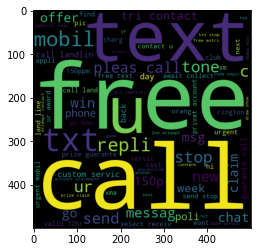

In [42]:
spam_wc=wc.generate(data[data['Type']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

most frequent words from spam are text, free, call

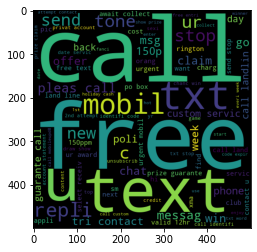

In [43]:
# for ham words
ham_wc=wc.generate(data[data["Type"]==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

most frequent words from ham are call, free ,text,u similar to spam

we can have a bar plot regarding most frequent words from spam and ham

In [45]:
x=data[data['Type']==1]['transformed_text'].str.cat(sep=" ")
spam_word_list=x.split()
len(spam_word_list)

9939

In [46]:
# top 30 most frequent words by using counter
from collections import Counter
spam_top_30words=pd.DataFrame(Counter(spam_word_list).most_common(30))

In [47]:
spam_top_30words.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


C:\Users\SREEJA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


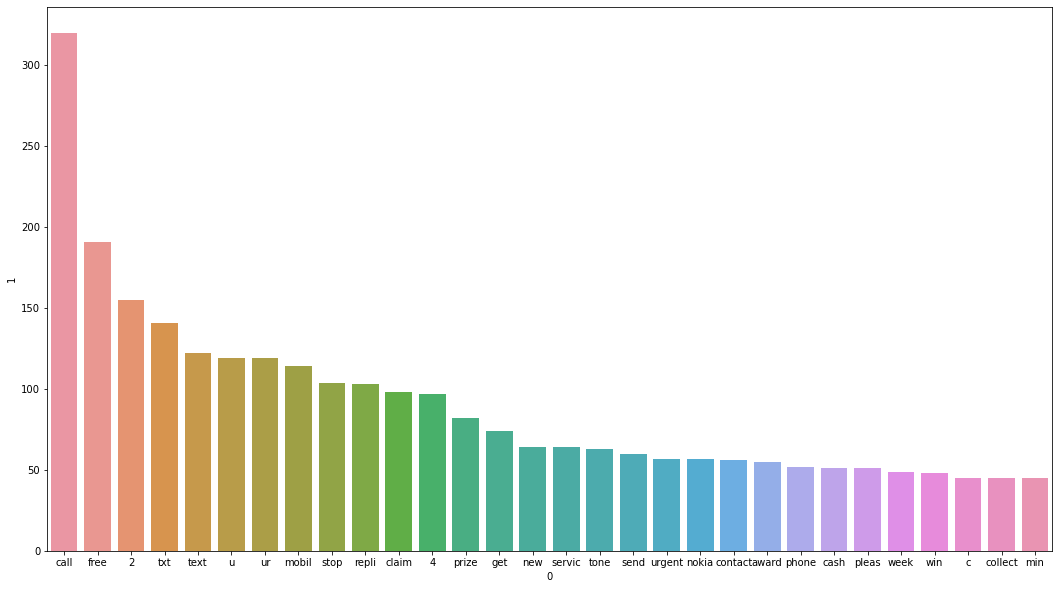

In [50]:
plt.figure(figsize=(18,10))
sns.barplot(spam_top_30words[0],spam_top_30words[1])
plt.show()

In [52]:
y=data[data['Type']==0]['transformed_text'].str.cat(sep=" ")
ham_word_list=y.split()
len(ham_word_list)

35394

In [54]:
ham_word_top30=pd.DataFrame(Counter(ham_word_list).most_common(30))

In [55]:
ham_word_top30.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


C:\Users\SREEJA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


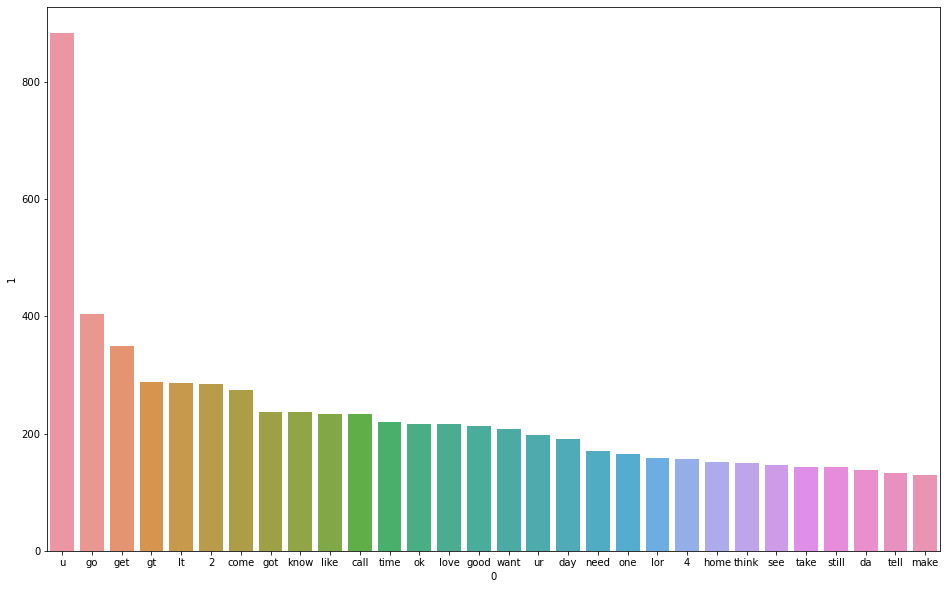

In [56]:
plt.figure(figsize=(16,10))
sns.barplot(ham_word_top30[0],ham_word_top30[1])
plt.show()

### Model Building

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [61]:
X=tf.fit_transform(data['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
y=np.array(data['Type'])

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [66]:
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier(n_estimators=50)
knn=KNeighborsClassifier()
xbg=XGBClassifier(n_estimators=50)

In [67]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [68]:
def score_prediction(mdl,X_train,X_test,y_train,y_test):
    mdl.fit(X_train,y_train)
    y_pred=mdl.predict(X_test)
    print("accuracy score: ",accuracy_score(y_test,y_pred))
    print("auroc score: ",roc_auc_score(y_test,y_pred))
    

In [70]:
score_prediction(lr,X_train,X_test,y_train,y_test)  # logistic regression

accuracy score:  0.9484203739522888
auroc score:  0.8036532788745178


In [71]:
score_prediction(dt,X_train,X_test,y_train,y_test) # decision tree

accuracy score:  0.9393939393939394
auroc score:  0.8072725209893352


In [72]:
score_prediction(rf,X_train,X_test,y_train,y_test) #random forest

accuracy score:  0.973565441650548
auroc score:  0.8970671658724755


In [73]:
score_prediction(knn,X_train,X_test,y_train,y_test) #knn

accuracy score:  0.903932946486138
auroc score:  0.617948717948718


In [75]:
score_prediction(xbg,X_train,X_test,y_train,y_test) #xbg

accuracy score:  0.9742101869761445
auroc score:  0.9193896074427048


XGBoost gave highest auroc score, we will use this model for our prediction.